In [1]:
import sys
sys.path.insert(1, '/content/drive/MyDrive/Colab Notebooks/')
from master_travel import *

from scipy import stats as st
from matplotlib import pyplot as plt

import hashlib

In [ ]:
from master_travel import *
from scipy import stats as st

import hashlib

In [ ]:
from math import factorial

def comb(n, k):
    return factorial(n) / (factorial(k) * factorial(n - k))

def fun(P, D):
    return P * comb(P, D) * sum([comb(D, i) for i in range(D)])

v = [fun(20, i) for i in range(1, 21)]

plt.plot(np.arange(1, 21), np.log(v))
plt.xticks(np.arange(1, 21))
plt.grid()
plt.show()

[(1+i, j) for i, j in enumerate(v)]

# Gráficos

In [2]:
def data_part(row):
    return pd.Series(
        row.raw.split(':'),
        index=[
            'cena',
            'modelo',
            'parte',
            'execucao',
            'topologia',
            'perda',
            'tempo',
            'solucoes',
            'score'])


def safe_to_dataframe(safe: tp.List[str]) -> pd.DataFrame:
    da = pd.DataFrame({'raw': safe})
    da = da.apply(data_part, 1).astype({
        'cena': 'int',
        'execucao': 'int',
        'perda': 'float',
        'tempo': 'float',
        'solucoes': 'int',
        'score': 'float'})
    return da[[
        'cena',
        'modelo',
        'parte',
        'execucao',
        'topologia',
        'perda',
        'tempo',
        'solucoes',
        'score']]


def get_data(code, vanilla = False):
    if vanilla:
        name = f'vanilla{str(code).zfill(2)}'
    else:
        name = f'agent{str(code).zfill(2)}'

    with open(f'{global_folder}/{name}.pickle', 'rb') as handle:
        prev = pickle.load(handle)

    return safe_to_dataframe(prev['agent']['set']['safe'])


In [3]:
vanilla = {'data': list()}
for i in range(30):
    aux = get_data(f'{i:02d}', vanilla=True)
    vanilla['data'] += [aux]
    print(aux.shape)

lifelong = {'data': list()}
for i in range(30):
    aux = get_data(f'{i:02d}', vanilla=False)
    lifelong['data'] += [aux]
    print(aux.shape)


(644, 9)
(644, 9)
(644, 9)
(644, 9)
(644, 9)
(644, 9)
(645, 9)
(645, 9)
(644, 9)
(644, 9)
(644, 9)
(644, 9)
(644, 9)
(644, 9)
(644, 9)
(644, 9)
(644, 9)
(644, 9)
(644, 9)
(644, 9)
(644, 9)
(644, 9)
(644, 9)
(644, 9)
(644, 9)
(644, 9)
(644, 9)
(644, 9)
(644, 9)
(644, 9)
(3170, 9)
(3488, 9)
(3171, 9)
(3168, 9)
(3167, 9)
(3172, 9)
(3170, 9)
(3171, 9)
(3171, 9)
(3171, 9)
(3172, 9)
(3170, 9)
(3170, 9)
(3171, 9)
(3172, 9)
(3171, 9)
(3171, 9)
(3173, 9)
(3172, 9)
(3171, 9)
(3172, 9)
(3172, 9)
(3172, 9)
(3173, 9)
(3172, 9)
(3172, 9)
(3171, 9)
(3172, 9)
(3173, 9)
(3172, 9)


In [5]:
def verify(idx, partes):
    idxs = list()
    stt = 0
    names = ['train', 'remove', 'combine']

    for i in range(len(idx)):
        for _ in range(3):
            name = names[stt]
            stt = (stt + 1) % 3
            if name == partes[i]:
                idxs.append(idx[i])
                break
            else:
                idxs.append(idx[i-1])
        else:
            print(i)
            print(idxs)
            print(stt)
            print(name)
            print(idx)
            print(partes)
            assert False, 'Erro aqui'

    return idxs


def count_params(inputs):
    def fun(topology):
        vars = [inputs] + [int(w) for w in topology[1:-1].split(',')]
        out = 0
        for i in range(len(vars) - 1):
            out += (vars[i] + 1) * vars[i + 1]
        return out
    return fun


def get_params(df, partes, cena, inputs):
    aux = df.loc[
            df.parte.isin(partes) & (df.cena == cena),
            ['parte', 'topologia', 'execucao']] \
            .drop_duplicates()

    idxs = verify(aux.index.values, aux.parte.values)

    return aux.loc[idxs, 'topologia'].apply(count_params(inputs), 1)


V = np.zeros((5, 30, 28))
L = np.zeros((5, 30, 28))

partes = ['train', 'remove', 'combine']

for i in range(30):
    aux_v = vanilla['data'][i]
    aux_l = lifelong['data'][i]
    aux_l = aux_l[aux_l.modelo == 'arcnet']

    for c in range(5):
        V[c, i, :] = get_params(aux_v, partes, c, 60)
        L[c, i, :] = get_params(aux_l, partes, c, 60)


/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the futur

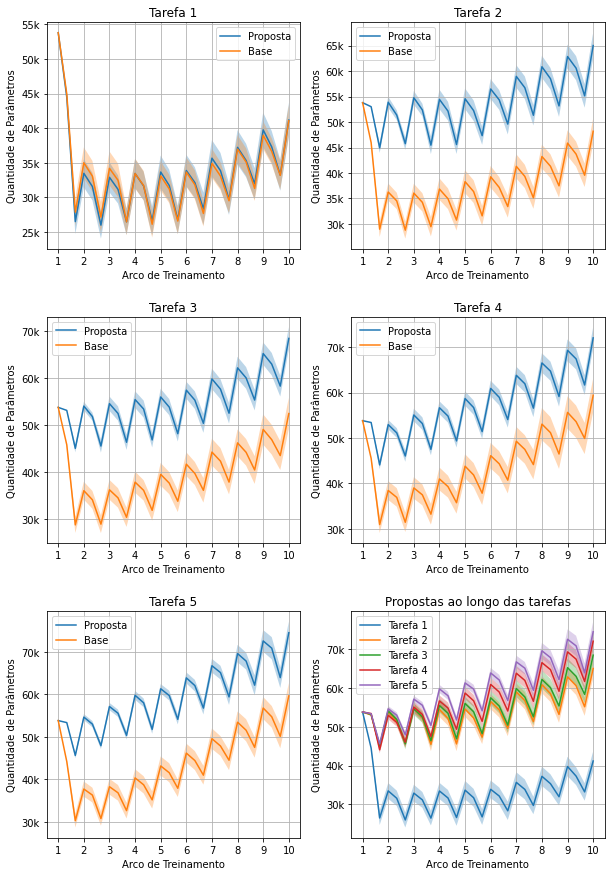

In [7]:
plt.figure(figsize=(10, 15))
plt.subplots_adjust(hspace=0.3)

for i in range(5):
    a, b = st.t.interval(
        0.95, 29,
        loc = np.mean(V[i], 0),
        scale = st.sem(V[i]))
    
    c, d = st.t.interval(
        0.95, 29,
        loc = np.mean(L[i], 0),
        scale = st.sem(L[i]))

    plt.subplot(321 + i)

    plt.plot(np.arange(0, 28), np.mean(L[i], 0), label='Proposta')
    plt.fill_between(np.arange(0, 28), c, d, alpha=0.3)
    plt.plot(np.arange(0, 28), np.mean(V[i], 0), label='Base')
    plt.fill_between(np.arange(0, 28), a, b, alpha=0.3)

    plt.xticks(np.arange(0, 29, 3), np.arange(1, 11))
    yticks, _ = plt.yticks()
    plt.yticks(yticks[1:-1], [f'{x/1000:.0f}k' for x in yticks[1:-1]])
    plt.grid()

    plt.title(f'Tarefa {i+1}')
    plt.xlabel('Arco de Treinamento')
    plt.ylabel('Quantidade de Parâmetros')
    plt.legend()

    plt.subplot(326)
    plt.plot(np.arange(0, 28), np.mean(L[i], 0), label=f'Tarefa {i+1}')
    plt.fill_between(np.arange(0, 28), c, d, alpha=0.3)

plt.legend()
plt.xticks(np.arange(0, 29, 3), np.arange(1, 11))
yticks, _ = plt.yticks()
plt.yticks(yticks[1:-1], [f'{x/1000:.0f}k' for x in yticks[1:-1]])
plt.grid()

plt.title('Propostas ao longo das tarefas')
plt.xlabel('Arco de Treinamento')
plt.ylabel('Quantidade de Parâmetros')

plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b 

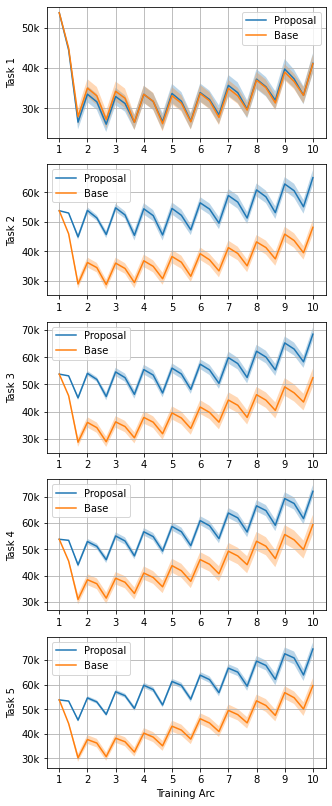

In [ ]:
plt.figure(figsize=(5, 14))
# plt.subplots_adjust(hspace=0.3)

for i in range(5):
    a, b = st.t.interval(
        0.95, 29,
        loc = np.mean(V[i], 0),
        scale = st.sem(V[i]))
    
    c, d = st.t.interval(
        0.95, 29,
        loc = np.mean(L[i], 0),
        scale = st.sem(L[i]))

    plt.subplot(511 + i)

    plt.plot(np.arange(0, 28), np.mean(L[i], 0), label='Proposal')
    plt.fill_between(np.arange(0, 28), c, d, alpha=0.3)
    plt.plot(np.arange(0, 28), np.mean(V[i], 0), label='Base')
    plt.fill_between(np.arange(0, 28), a, b, alpha=0.3)

    plt.xticks(np.arange(0, 29, 3), np.arange(1, 11))
    yticks, _ = plt.yticks()
    plt.yticks(yticks[1:-1], [f'{x/1000:.0f}k' for x in yticks[1:-1]])
    plt.grid()

    plt.ylabel(f'Task {i+1}')
    if i == 4:
        plt.xlabel('Training Arc')

    plt.legend()

#     plt.subplot(326)
#     plt.plot(np.arange(0, 28), np.mean(L[i], 0), label=f'Tarefa {i+1}')
#     plt.fill_between(np.arange(0, 28), c, d, alpha=0.3)

# plt.legend()
# plt.xticks(np.arange(0, 29, 3), np.arange(1, 11))
# yticks, _ = plt.yticks()
# plt.yticks(yticks[1:-1], [f'{x/1000:.0f}k' for x in yticks[1:-1]])
# plt.grid()

# plt.title('Propostas ao longo das tarefas')
# plt.xlabel('Seção de Treinamento')
# plt.ylabel('Quantidade de Parâmetros')

plt.show()

In [ ]:
print('Inicial: 53807')

print('\nAdicionados')
for i in range(5):
    v = V[i][:, 1:].reshape((30, 9, 3))
    l = L[i][:, 1:].reshape((30, 9, 3))

    v = np.sum(v[:, :, 2] - v[:, :, 1], 1)
    l = np.sum(l[:, :, 2] - l[:, :, 1], 1)

    _, cv = st.t.interval(
        0.95, 29,
        scale = st.sem(v))
    
    _, cl = st.t.interval(
        0.95, 29,
        scale = st.sem(l))
    
    print('Cena {}: Base {:.0f} ({:.0f}) x Proposta {:.0f} ({:.0f})'.format(
        i,
        np.mean(v),
        cv,
        np.mean(l),
        cl))

print('\nRemovidos')
for i in range(5):
    v = V[i][:, :-1].reshape((30, 9, 3))
    l = L[i][:, :-1].reshape((30, 9, 3))

    v = np.sum(v[:, :, 0] - v[:, :, 1], 1)
    l = np.sum(l[:, :, 0] - l[:, :, 1], 1)

    _, cv = st.t.interval(
        0.95, 29,
        loc = 0,
        scale = st.sem(v))

    _, cl = st.t.interval(
        0.95, 29,
        loc = 0,
        scale = st.sem(l))

    print('Cena {}: Base {:.0f} ({:.0f}) x Proposta {:.0f} ({:.0f})'.format(
        i,
        np.mean(v),
        cv,
        np.mean(l),
        cl))

print('\nCombinados')
for i in range(5):
    v = V[i][:, :-1].reshape((30, 9, 3))
    l = L[i][:, :-1].reshape((30, 9, 3))

    v = np.sum(v[:, :, 1] - v[:, :, 2], 1)
    l = np.sum(l[:, :, 1] - l[:, :, 2], 1)

    _, cv = st.t.interval(
        0.95, 29,
        loc = 0,
        scale = st.sem(v))

    _, cl = st.t.interval(
        0.95, 29,
        loc = 0,
        scale = st.sem(l))

    print('Cena {}: Base {:.0f} ({:.0f}) x Proposta {:.0f} ({:.0f})'.format(
        i,
        np.mean(v),
        cv,
        np.mean(l),
        cl))

Inicial: 53807

Adicionados
Cena 0: Base 0 (nan) x Proposta 0 (nan)
Cena 1: Base 0 (nan) x Proposta 0 (nan)
Cena 2: Base 0 (nan) x Proposta 0 (nan)
Cena 3: Base 0 (nan) x Proposta 0 (nan)
Cena 4: Base 0 (nan) x Proposta 0 (nan)

Removidos
Cena 0: Base 0 (nan) x Proposta 0 (nan)
Cena 1: Base 0 (nan) x Proposta 0 (nan)
Cena 2: Base 0 (nan) x Proposta 0 (nan)
Cena 3: Base 0 (nan) x Proposta 0 (nan)
Cena 4: Base 0 (nan) x Proposta 0 (nan)

Combinados
Cena 0: Base 0 (nan) x Proposta 0 (nan)
Cena 1: Base 0 (nan) x Proposta 0 (nan)
Cena 2: Base 0 (nan) x Proposta 0 (nan)
Cena 3: Base 0 (nan) x Proposta 0 (nan)
Cena 4: Base 0 (nan) x Proposta 0 (nan)


/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [8]:
L = np.zeros((5, 30, 30))

partes = ['train', 'remove', 'combine']

for i in range(30):
    aux_l = lifelong['data'][i]
    aux_l = aux_l[aux_l.modelo == 'ae']

    for c in range(5):
        L[c, i, :] = get_params(aux_l, partes, c, 300)


/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the futur

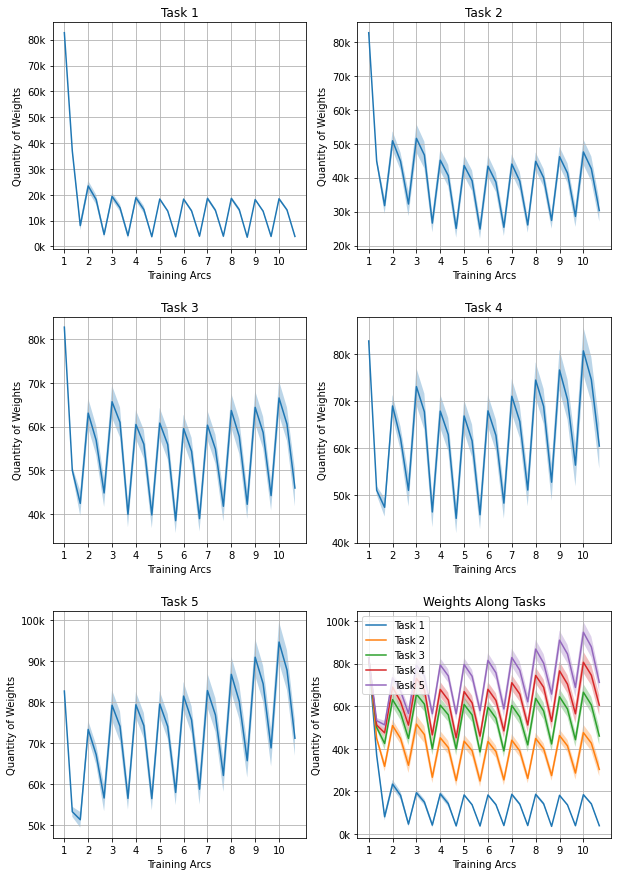

In [13]:
plt.figure(figsize=(10, 15))
plt.subplots_adjust(hspace=0.3)

for i in range(5):
    plt.subplot(321 + i)

    a, b = st.t.interval(
        0.95, 29,
        loc = np.mean(L[i], 0),
        scale = st.sem(L[i]))

    plt.plot(np.mean(L[i], 0))
    plt.fill_between(np.arange(30), a, b, alpha=0.3)

    plt.xticks(np.arange(0, 30, 3), np.arange(1, 11))
    plt.grid()

    yticks, _ = plt.yticks()
    plt.yticks(yticks[1:-1], [f'{x/1000:.0f}k' for x in yticks[1:-1]])

    plt.ylabel('Quantity of Weights')
    plt.xlabel('Training Arcs')
    plt.title(f'Task {i + 1}')

    plt.subplot(326)
    plt.plot(np.mean(L[i], 0), label=f'Task {i + 1}')
    plt.fill_between(np.arange(30), a, b, alpha=0.3)

plt.legend(loc=2)
plt.title('Weights Along Tasks')
plt.xlabel('Training Arcs')
plt.ylabel('Quantity of Weights')
yticks, _ = plt.yticks()
plt.yticks(yticks[1:-1], [f'{x/1000:.0f}k' for x in yticks[1:-1]])
plt.xticks(np.arange(0, 30, 3), np.arange(1, 11))
plt.grid()

plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b 

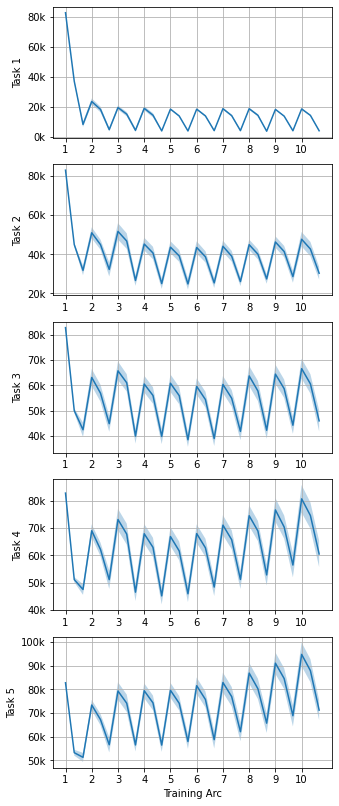

In [ ]:
plt.figure(figsize=(5, 14))

for i in range(5):
    plt.subplot(511 + i)

    a, b = st.t.interval(
        0.95, 29,
        loc = np.mean(L[i], 0),
        scale = st.sem(L[i]))

    plt.plot(np.mean(L[i], 0))
    plt.fill_between(np.arange(30), a, b, alpha=0.3)

    plt.xticks(np.arange(0, 30, 3), np.arange(1, 11))
    plt.grid()

    yticks, _ = plt.yticks()
    plt.yticks(yticks[1:-1], [f'{x/1000:.0f}k' for x in yticks[1:-1]])

    if i == 4:
        plt.xlabel('Training Arc')
    plt.ylabel(f'Task {i + 1}')

plt.show()

In [ ]:
print('Inicial: 82710')

print('\nAdicionados')
for i in range(5):
    l = L[i].reshape((30, 10, 3))
    l = np.sum(l[:, 1:, 0] - l[:, :-1, 2], 1)
    
    _, cl = st.t.interval(
        0.95, 29,
        scale = st.sem(l))
    
    print('Cena {}: {:.0f} ({:.0f})'.format(
        i,
        np.mean(l),
        cl))

print('\nRemovidos')
for i in range(5):
    l = L[i].reshape((30, 10, 3))
    l = np.sum(l[:, :, 0] - l[:, :, 1], 1)

    _, cl = st.t.interval(
        0.95, 29,
        scale = st.sem(l))
    
    print('Cena {}: {:.0f} ({:.0f})'.format(
        i,
        np.mean(l),
        cl))

print('\nCombinados')
for i in range(5):
    l = L[i].reshape((30, 10, 3))
    l = np.sum(l[:, :, 1] - l[:, :, 2], 1)

    _, cl = st.t.interval(
        0.95, 29,
        scale = st.sem(l))
    
    print('Cena {}: {:.0f} ({:.0f})'.format(
        i,
        np.mean(l),
        cl))

Inicial: 82710

Adicionados
Cena 0: 132318 (601)
Cena 1: 169186 (3322)
Cena 2: 191619 (3013)
Cena 3: 202349 (3025)
Cena 4: 214561 (3328)

Removidos
Cena 0: 87011 (1239)
Cena 1: 82208 (2021)
Cena 2: 81326 (1587)
Cena 3: 82486 (1440)
Cena 4: 83261 (1772)

Combinados
Cena 0: 124153 (1377)
Cena 1: 139382 (2742)
Cena 2: 147035 (3795)
Cena 3: 142117 (4181)
Cena 4: 142843 (3263)


In [14]:
L = np.zeros((5, 30, 30))
S = np.zeros((5, 30))

partes = ['train', 'remove', 'combine']

for i in range(30):
    aux_l = lifelong['data'][i]
    sm = aux_l.loc[
        (aux_l.modelo == 'memory') & (aux_l.parte == 'save'), 'topologia'] \
        .apply(lambda x: int(x[1:].split(',')[0]), 1).values
    sc = aux_l.loc[
        (aux_l.modelo == 'ae') & (aux_l.parte == 'save'), 'topologia'] \
        .apply(lambda x: int(x[1:].split(',')[2]), 1).values

    aux_l = aux_l[aux_l.modelo == 'memory']

    for c in range(5):
        L[c, i, :] = get_params(aux_l, partes, c, 60)
        S[c, i] = sm[c] * sc[c]

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  M

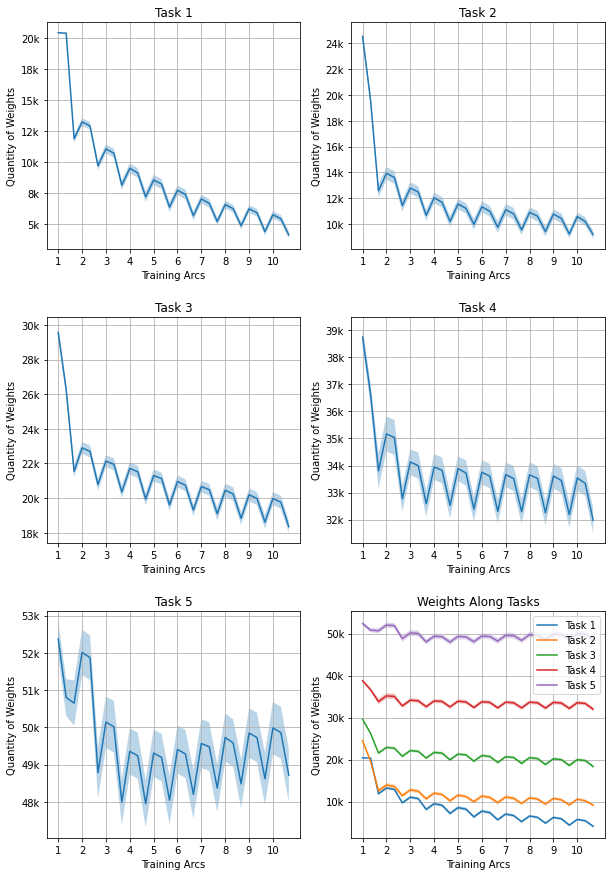

In [16]:
plt.figure(figsize=(10, 15))
plt.subplots_adjust(hspace=0.3)

for i in range(5):
    plt.subplot(321 + i)

    a, b = st.t.interval(
        0.95, 29,
        loc = np.mean(L[i], 0),
        scale = st.sem(L[i]))

    plt.plot(np.mean(L[i], 0))
    plt.fill_between(np.arange(30), a, b, alpha=0.3)

    plt.xticks(np.arange(0, 30, 3), np.arange(1, 11))
    plt.grid()

    yticks, _ = plt.yticks()
    plt.yticks(yticks[1:-1], [f'{x/1000:.0f}k' for x in yticks[1:-1]])

    plt.ylabel('Quantity of Weights')
    plt.xlabel('Training Arcs')
    plt.title(f'Task {i + 1}')

    plt.subplot(326)
    plt.plot(np.mean(L[i], 0), label=f'Task {i + 1}')
    plt.fill_between(np.arange(30), a, b, alpha=0.3)

plt.legend()
plt.title('Weights Along Tasks')
plt.ylabel('Quantity of Weights')
plt.xlabel('Training Arcs')
yticks, _ = plt.yticks()
plt.yticks(yticks[1:-1], [f'{x/1000:.0f}k' for x in yticks[1:-1]])
plt.xticks(np.arange(0, 30, 3), np.arange(1, 11))
plt.grid()

plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


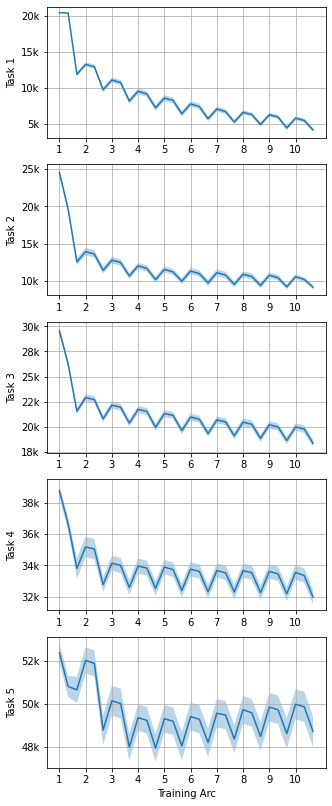

In [ ]:
plt.figure(figsize=(5, 14))

for i in range(5):
    plt.subplot(511 + i)

    a, b = st.t.interval(
        0.95, 29,
        loc = np.mean(L[i], 0),
        scale = st.sem(L[i]))

    plt.plot(np.mean(L[i], 0))
    plt.fill_between(np.arange(30), a, b, alpha=0.3)

    plt.xticks(np.arange(0, 30, 3), np.arange(1, 11))
    plt.grid()

    yticks, _ = plt.yticks()
    plt.yticks(yticks[1:-1], [f'{x/1000:.0f}k' for x in yticks[1:-1]])

    if i == 4:
        plt.xlabel('Training Arc')
    plt.ylabel(f'Task {i + 1}')

plt.show()

In [ ]:
print('Inicios')
for i in range(5):
    l = L[i, :, 0]
    s = S[i]

    _, cl = st.t.interval(
        0.95, 29,
        scale = st.sem(l))
    
    _, cs = st.t.interval(
        0.95, 29,
        scale = st.sem(s))

    print('Cena {}: Memory {:.0f} ({:.0f}) Selectors {:.0f} ({:.0f})'.format(
        i,
        np.mean(l),
        cl,
        np.mean(s),
        cs))

print('\nAdicionados')
for i in range(5):
    l = L[i].reshape((30, 10, 3))
    l = np.sum(l[:, 1:, 0] - l[:, :-1, 2], 1)

    _, cl = st.t.interval(
        0.95, 29,
        scale = st.sem(l))
    
    print('Cena {}: {:.0f} ({:.0f})'.format(
        i,
        np.mean(l),
        cl))

print('\nRemovidos')
for i in range(5):
    l = L[i].reshape((30, 10, 3))
    l = np.sum(l[:, :, 0] - l[:, :, 1], 1)

    _, cl = st.t.interval(
        0.95, 29,
        scale = st.sem(l))
    
    print('Cena {}: {:.0f} ({:.0f})'.format(
        i,
        np.mean(l),
        cl))
    
print('\nCombinados')
for i in range(5):
    l = L[i].reshape((30, 10, 3))
    l = np.sum(l[:, :, 1] - l[:, :, 2], 1)

    _, cl = st.t.interval(
        0.95, 29,
        scale = st.sem(l))
    
    print('Cena {}: {:.0f} ({:.0f})'.format(
        i,
        np.mean(l),
        cl))

print('\nSeletores')
for i in range(5):
    s = S[i]

    _, cs = st.t.interval(
        0.95, 29,
        scale = st.sem(s))

    print('Cena {}: {:.0f} ({:.0f})'.format(
        i,
        np.mean(s),
        cs))


Inicios
Cena 0: Memory 20407 (nan) Selectors 303 (21)
Cena 1: Memory 24528 (292) Selectors 2801 (643)
Cena 2: Memory 29571 (307) Selectors 9352 (1328)
Cena 3: Memory 38747 (366) Selectors 19402 (1617)
Cena 4: Memory 52372 (466) Selectors 29440 (2623)

Adicionados
Cena 0: 12240 (nan)
Cena 1: 12240 (nan)
Cena 2: 12240 (nan)
Cena 3: 12240 (nan)
Cena 4: 12240 (nan)

Removidos
Cena 0: 3080 (136)
Cena 1: 7940 (263)
Cena 2: 5102 (195)
Cena 3: 3434 (194)
Cena 4: 2670 (122)

Combinados
Cena 0: 25439 (361)
Cena 1: 19657 (321)
Cena 2: 18362 (320)
Cena 3: 15581 (480)
Cena 4: 13224 (400)

Seletores
Cena 0: 303 (21)
Cena 1: 2801 (643)
Cena 2: 9352 (1328)
Cena 3: 19402 (1617)
Cena 4: 29440 (2623)


/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [ ]:
z = np.zeros((5, 30))

for i in range(30):
    aux = lifelong['data'][i]

    for c in range(5):
        x = aux.loc[
            (aux.modelo == 'arcnet') & (aux.cena == c) \
            & aux.parte.isin(['combine', 'remove']), 'score'] \
            .values.reshape(9, 2)
        z[c, i] += np.sum(x[:, 0] - x[:, 1])
z /= 9

print('Score loss from combination in arcnet')
for i in range(5):
    _, ci = st.t.interval(
        0.95, 29,
        scale = st.sem(z[i]))
    
    print('Cena {}: {:.3f} ({:.3f})'.format(
        i,
        np.mean(z[i]),
        ci))


Score loss from combination in arcnet
Cena 0: 0.107 (0.009)
Cena 1: 0.091 (0.012)
Cena 2: 0.063 (0.012)
Cena 3: 0.054 (0.014)
Cena 4: 0.071 (0.014)


In [ ]:
z = np.zeros((5, 30))

for i in range(30):
    aux = lifelong['data'][i]

    for c in range(5):
        x = aux.loc[
            (aux.modelo == 'memory') & (aux.cena == c) \
            & aux.parte.isin(['combine', 'remove']), 'score'] \
            .values.reshape(10, 2)
        z[c, i] += np.sum(x[:, 0] - x[:, 1])
z /= 10

print('Score loss from combination in memory')
for i in range(5):
    _, ci = st.t.interval(
        0.95, 29,
        scale = st.sem(z[i]))
    
    print('Cena {}: {:.3f} ({:.3f})'.format(
        i,
        np.mean(z[i]),
        ci))


Score loss from combination in memory
Cena 0: 0.376 (0.015)
Cena 1: 0.136 (0.021)
Cena 2: 0.028 (0.010)
Cena 3: 0.013 (0.010)
Cena 4: -0.027 (0.052)


In [17]:
vanilla['perda'] = list()
vanilla['perda_inf'] = list()
vanilla['perda_sup'] = list()
vanilla['solucoes'] = list()
vanilla['solucoes_inf'] = list()
vanilla['solucoes_sup'] = list()
vanilla['score'] = list()
vanilla['score_inf'] = list()
vanilla['score_sup'] = list()

lifelong['perda'] = list()
lifelong['perda_inf'] = list()
lifelong['perda_sup'] = list()
lifelong['solucoes'] = list()
lifelong['solucoes_inf'] = list()
lifelong['solucoes_sup'] = list()
lifelong['score'] = list()
lifelong['score_inf'] = list()
lifelong['score_sup'] = list()

size = [100, 100, 100, 100, 100]

for exp in range(5):
    van_prd = np.zeros(size[exp])
    van_slc = np.zeros(size[exp])
    van_scr = np.zeros(size[exp])

    len_vanilla = len(vanilla['data'])

    auxer = {
        'perda': np.zeros((len_vanilla, size[exp])),
        'solucoes': np.zeros((len_vanilla, size[exp])),
        'score': np.zeros((len_vanilla, size[exp]))}

    for i, aux in enumerate(vanilla['data']):
        idx = (aux.cena == exp) & (aux.modelo == 'arcnet') & (aux.parte == 'train')
        van_prd += aux[idx].perda.values / len_vanilla
        van_slc += aux[idx].solucoes.values / len_vanilla
        van_scr += aux[idx].score.values / len_vanilla
        auxer['perda'][i] = aux[idx].perda.values
        auxer['solucoes'][i] = aux[idx].solucoes.values
        auxer['score'][i] = aux[idx].score.values

    vanilla['perda'] += [van_prd]
    vanilla['solucoes'] += [van_slc]
    vanilla['score'] += [van_scr]
    
    for var in ['perda', 'solucoes', 'score']:
        a, b = st.t.interval(
            0.95, 29,
            loc = vanilla[f'{var}'][exp],
            scale = st.sem(auxer[var]))
        vanilla[f'{var}_inf'] += [a]
        vanilla[f'{var}_sup'] += [b]

    lfl_prd = np.zeros(size[exp])
    lfl_slc = np.zeros(size[exp])
    lfl_scr = np.zeros(size[exp])

    len_lifelong = len(lifelong['data'])

    auxer = {
        'perda': np.zeros((len_lifelong, size[exp])),
        'solucoes': np.zeros((len_lifelong, size[exp])),
        'score': np.zeros((len_lifelong, size[exp]))}

    for i, aux in enumerate(lifelong['data']):
        idx = (aux.cena == exp) & (aux.modelo == 'arcnet') & (aux.parte == 'train')
        lfl_prd += aux[idx].perda.values / len_lifelong
        lfl_slc += aux[idx].solucoes.values / len_lifelong
        lfl_scr += aux[idx].score.values / len_lifelong
        auxer['perda'][i] = aux[idx].perda.values
        auxer['solucoes'][i] = aux[idx].solucoes.values
        auxer['score'][i] = aux[idx].score.values

    lifelong['perda'] += [lfl_prd]
    lifelong['solucoes'] += [lfl_slc]
    lifelong['score'] += [lfl_scr]

    for var in ['perda', 'solucoes', 'score']:
        a, b = st.t.interval(
            0.95, 29,
            loc = lifelong[f'{var}'][exp],
            scale = st.sem(auxer[var]))
        lifelong[f'{var}_inf'] += [a]
        lifelong[f'{var}_sup'] += [b]


In [ ]:
for i in range(5):
    a = lifelong[f'score'][i][-1]
    b = lifelong[f'score'][i][-1] - lifelong[f'score_inf'][i][-1]
    c = vanilla[f'score'][i][-1]
    d = vanilla[f'score'][i][-1] - vanilla[f'score_inf'][i][-1]

    print(f'{i} - ll {a:.3f} ({b:.3f}) - vl {c:.3f} ({d:.3f})')

0 - ll 9.654 (0.008) - vl 9.643 (0.012)
1 - ll 9.554 (0.015) - vl 9.156 (0.026)
2 - ll 9.446 (0.025) - vl 9.103 (0.016)
3 - ll 9.201 (0.026) - vl 9.046 (0.021)
4 - ll 8.997 (0.026) - vl 8.926 (0.022)


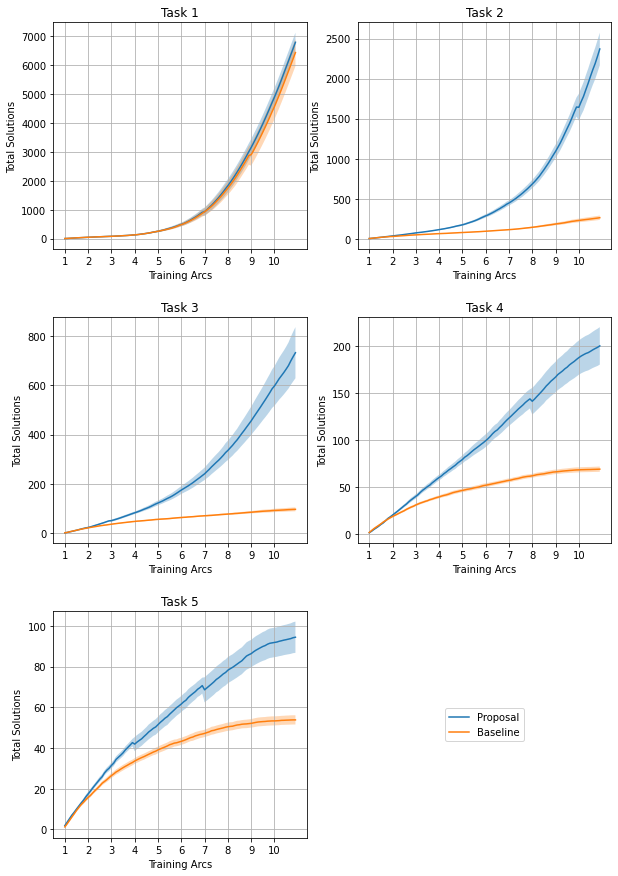

In [18]:
var = 'solucoes'

plt.figure(figsize=(10, 15))
plt.subplots_adjust(hspace=0.3)

for i in range(5):
    plt.subplot(321 + i)
    x = np.arange(len(vanilla[var][i]))
    plt.title(f'Task {i + 1}')
    plt.plot(lifelong[var][i], label='Proposal')
    plt.fill_between(x, lifelong[f'{var}_inf'][i], lifelong[f'{var}_sup'][i], alpha=0.3)
    plt.plot(x, vanilla[var][i], label='Baseline')
    plt.fill_between(x, vanilla[f'{var}_inf'][i], vanilla[f'{var}_sup'][i], alpha=0.3)
    plt.xticks(np.arange(0, 100, 10), np.arange(1, 11))
    plt.xlabel('Training Arcs')
    plt.ylabel('Total Solutions')
    plt.grid()

plt.subplot(326)
plt.plot([0], [0], label='Proposal')
plt.plot([0], [0], label='Baseline')
plt.legend(loc='center')
plt.axis('off')

plt.show()

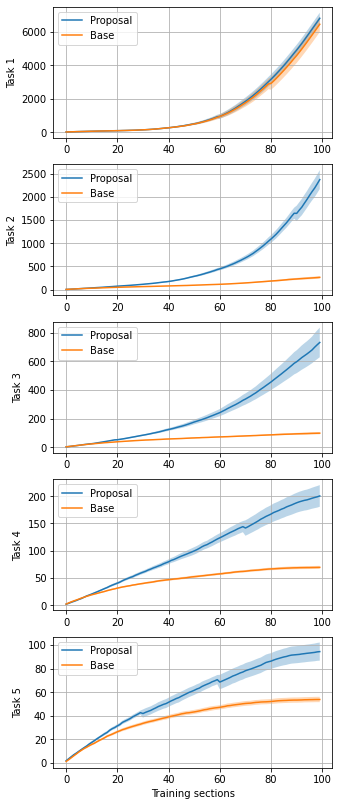

In [ ]:
var = 'solucoes'

plt.figure(figsize=(5, 14))

for i in range(5):
    plt.subplot(511 + i)
    x = np.arange(len(vanilla[var][i]))
    plt.plot(lifelong[var][i], label='Proposal')
    plt.fill_between(x, lifelong[f'{var}_inf'][i], lifelong[f'{var}_sup'][i], alpha=0.3)
    plt.plot(x, vanilla[var][i], label='Base')
    plt.fill_between(x, vanilla[f'{var}_inf'][i], vanilla[f'{var}_sup'][i], alpha=0.3)
    if i == 4:
        plt.xlabel('Training sections')
    plt.ylabel(f'Task {i + 1}')
    plt.grid()
    plt.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

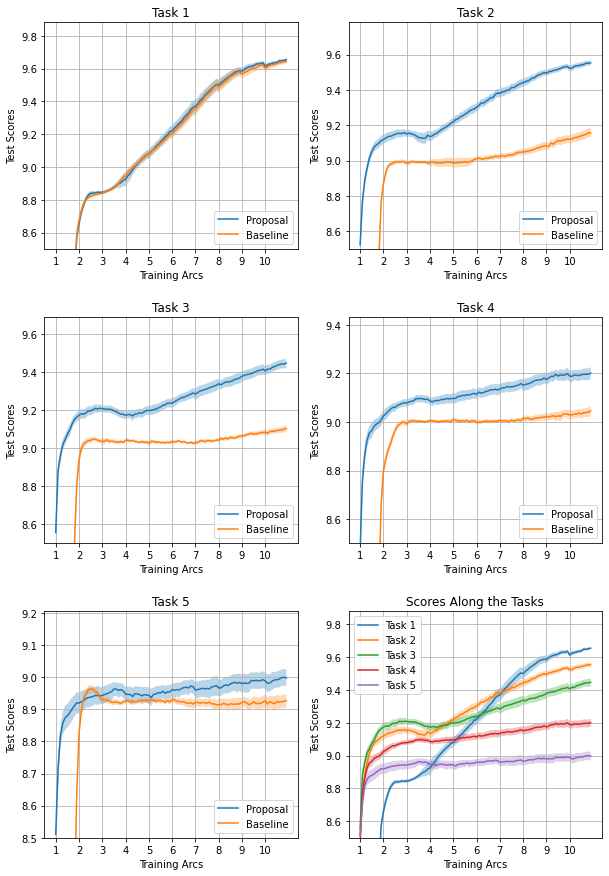

In [19]:
var = 'score'

plt.figure(figsize=(10, 15))
plt.subplots_adjust(hspace=0.3)

for i in range(5):
    plt.subplot(321 + i)
    x = np.arange(len(vanilla[var][i]))
    plt.title(f'Task {i + 1}')
    plt.plot(lifelong[var][i], label='Proposal')
    plt.fill_between(x, lifelong[f'{var}_inf'][i], lifelong[f'{var}_sup'][i], alpha=0.3)
    plt.plot(x, vanilla[var][i], label='Baseline')
    plt.fill_between(x, vanilla[f'{var}_inf'][i], vanilla[f'{var}_sup'][i], alpha=0.3)
    plt.xlabel('Training Arcs')
    plt.ylabel('Test Scores')
    plt.grid()
    plt.legend(loc=4)
    plt.axis(ymin=8.5)

    plt.xticks(np.arange(0, 100, 10), np.arange(1, 11))

    plt.subplot(326)
    plt.plot(lifelong[var][i], label=f'Task {i + 1}')
    plt.fill_between(x, lifelong[f'{var}_inf'][i], lifelong[f'{var}_sup'][i], alpha=0.3)

plt.subplot(326)
plt.xlabel('Training Arcs')
plt.ylabel('Test Scores')
plt.title('Scores Along the Tasks')
plt.legend()
plt.grid()
plt.axis(ymin=8.5)
plt.xticks(np.arange(0, 100, 10), np.arange(1, 11))

plt.show()

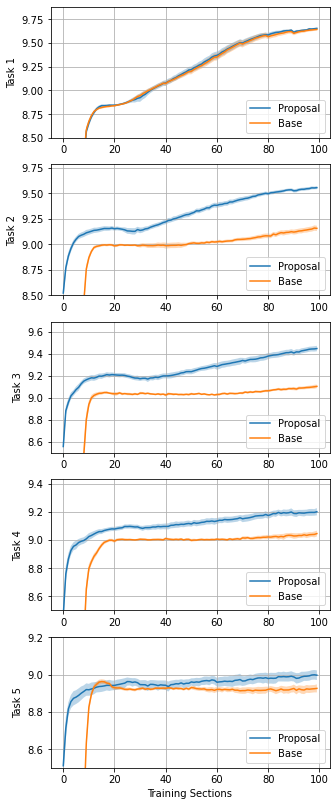

In [ ]:
var = 'score'

plt.figure(figsize=(5, 14))

size = 100

for i in range(5):
    plt.subplot(511 + i)
    x = np.arange(len(vanilla[var][i]))[:size]
    plt.plot(lifelong[var][i][:size], label='Proposal')
    plt.fill_between(x, lifelong[f'{var}_inf'][i][:size], lifelong[f'{var}_sup'][i][:size], alpha=0.3)
    plt.plot(x, vanilla[var][i][:size], label='Base')
    plt.fill_between(x, vanilla[f'{var}_inf'][i][:size], vanilla[f'{var}_sup'][i][:size], alpha=0.3)
    plt.ylabel(f'Task {i + 1}')
    if i == 4:
        plt.xlabel('Training Sections')
    plt.grid()
    plt.legend(loc=4)
    plt.axis(ymin=8.5)

#     plt.subplot(326)
#     plt.plot(lifelong[var][i], label=f'Tarefa {i + 1}')
#     plt.fill_between(x, lifelong[f'{var}_inf'][i], lifelong[f'{var}_sup'][i], alpha=0.3)

# plt.subplot(326)
# plt.xlabel('Iterações')
# plt.ylabel('Nota de Avaliação')
# plt.title('Proposta ao longo das tarefas')
# plt.legend()
# plt.grid()
# plt.axis(ymin=8.5)

plt.show()

In [20]:
def gen(aux, cena):
    df = aux.loc[
        (aux.cena == cena) & (aux.modelo == 'memory') & (aux.parte == 'train'),
        ['execucao', 'score']]

    exec = 0
    ret = np.zeros(500)
    pos = 0
    prev = 0

    for _, row in df.iterrows():
        if exec != row.execucao:
            exec += 1
            ret[pos:exec * 50] = prev
            pos = exec * 50

        prev = row.score
        ret[pos] = prev
        pos += 1

    if pos != 500:
        ret[pos:] = prev

    return ret

z = np.zeros((5, 30, 500))

for i in range(30):
    aux = lifelong['data'][i]
    for c in range(5):
        z[c, i, :] = gen(aux, c)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

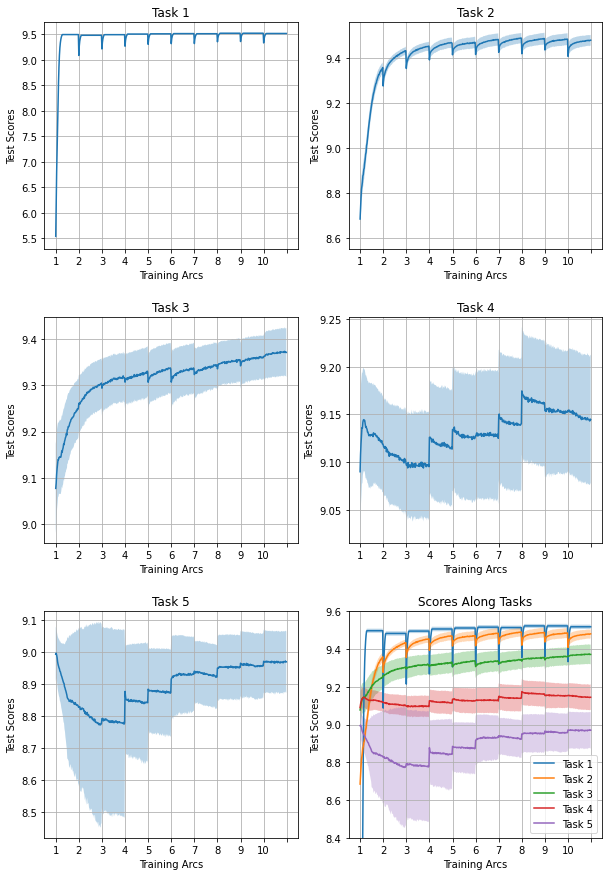

In [21]:
plt.figure(figsize=(10, 15))
plt.subplots_adjust(hspace=0.3)

for i in range(5):
    plt.subplot(321 + i)

    a, b = st.t.interval(
        0.95, 29,
        loc = np.mean(z[i], 0),
        scale = st.sem(z[i]))
    
    plt.plot(np.arange(500), np.mean(z[i], 0))
    plt.fill_between(np.arange(500), a, b, alpha=0.3)

    plt.title(f'Task {i + 1}')
    plt.xticks(
        np.arange(0, 501, 50),
        [f'{x}' if x < 11 else '' for x in np.arange(1, 12, 1)])
    plt.grid()

    plt.ylabel('Test Scores')
    plt.xlabel('Training Arcs')

    plt.subplot(326)
    plt.plot(np.arange(500), np.mean(z[i], 0), label=f'Task {i + 1}')
    plt.fill_between(np.arange(500), a, b, alpha=0.3)

plt.axis(ymin=8.4, ymax=9.6)
plt.xticks(
    np.arange(0, 501, 50),
    [f'{x}' if x < 11 else '' for x in np.arange(1, 12, 1)])
plt.ylabel('Test Scores')
plt.xlabel('Training Arcs')
plt.title('Scores Along Tasks')
plt.legend()
plt.grid()
plt.show()

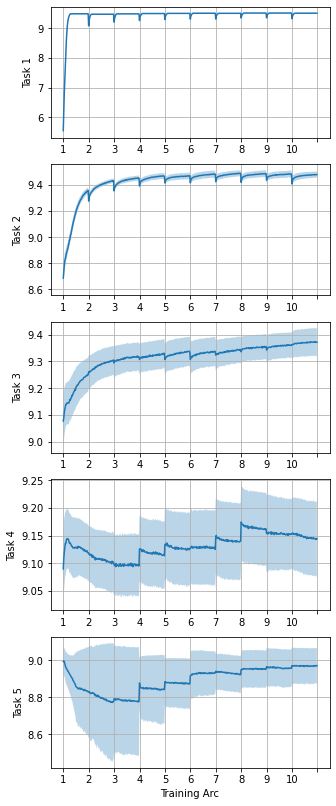

In [ ]:
plt.figure(figsize=(5, 14))

for i in range(5):
    plt.subplot(511 + i)

    a, b = st.t.interval(
        0.95, 29,
        loc = np.mean(z[i], 0),
        scale = st.sem(z[i]))
    
    plt.plot(np.arange(500), np.mean(z[i], 0))
    plt.fill_between(np.arange(500), a, b, alpha=0.3)

    plt.ylabel(f'Task {i + 1}')
    plt.xticks(
        np.arange(0, 501, 50),
        [f'{x}' if x < 11 else '' for x in np.arange(1, 12, 1)])
    plt.grid()

    if i == 4:
        plt.xlabel('Training Arc')

plt.show()

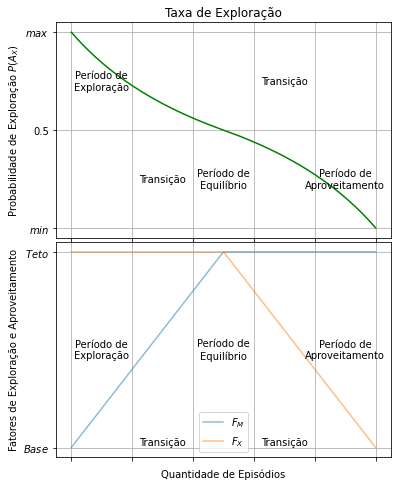

In [ ]:
x = np.linspace(0, 1, 1000)
# y = np.clip([40 * x - 7, -40 * x + 33], 1, 9)
y = np.clip([16 * x + 1, -16 * x + 17], 1, 9)
z = y[1] / y.sum(0)

plt.figure(figsize=(6, 8))

plt.subplot(211)
plt.plot(x, z, c='g')
plt.grid()
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], [])
plt.yticks([0.1, 0.5, 0.9], [r'$min$', '0.5', r'$max$'])
plt.title('Taxa de Exploração')
plt.text(0.1, 0.7, 'Período de\nExploração', ha='center', va='center')
plt.text(0.3, 0.3, 'Transição', ha='center', va='center')
plt.text(0.5, 0.3, 'Período de\nEquilíbrio', ha='center', va='center')
plt.text(0.7, 0.7, 'Transição', ha='center', va='center')
plt.text(0.9, 0.3, 'Período de\nAproveitamento', ha='center', va='center')

plt.ylabel(f'Probabilidade de Exploração $P(A_X)$')

plt.subplot(212)
plt.plot(x, y[0], alpha=0.5, label=r'$F_M$')
plt.plot(x, y[1], alpha=0.5, label=r'$F_X$')

plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], [])
plt.yticks([1, 9], [r'$Base$', r'$Teto$'])

plt.text(0.1, 5, 'Período de\nExploração', ha='center', va='center')
plt.text(0.3, 1, 'Transição', ha='center', va='bottom')
plt.text(0.5, 5, 'Período de\nEquilíbrio', ha='center', va='center')
plt.text(0.7, 1, 'Transição', ha='center', va='bottom')
plt.text(0.9, 5, 'Período de\nAproveitamento', ha='center', va='center')

plt.grid()

plt.legend(loc=8)

plt.xlabel('Quantidade de Episódios')
plt.ylabel('Fatores de Exploração e Aproveitamento')

plt.subplots_adjust(hspace=0.02)

plt.show()

In [ ]:
vanilla = {'data': list()}
for i in range(14):
    with open(f'/home/aislan/Downloads/vanilla/vanilla{str(i).zfill(2)}.pickle', 'rb') as handle:
        prev = pickle.load(handle)

    vanilla['data'] += [pd.DataFrame({'raw': prev['agent']['set']['safe']})]
    vanilla['data'][i] = vanilla['data'][i].apply(data_part, 1).astype({
        'cena': 'int',
        'execucao': 'int',
        'perda': 'float',
        'tempo': 'float',
        'solucoes': 'int'})
    print(vanilla['data'][i].shape)

vanilla['p'] = np.zeros((len(vanilla['data']), 5))
vanilla['s'] = np.zeros((len(vanilla['data']), 5))
vanilla['i'] = np.zeros((len(vanilla['data']), 5))

for scn in range(5):
    for exp in range(len(vanilla)):
        df = vanilla['data'][exp]
        idx = (df.cena == scn) & (df.modelo == 'arcnet') & (df.parte == 'train')
        vanilla['p'][exp, scn] = df.loc[idx, 'perda'].mean()
        vanilla['s'][exp, scn] = df.loc[idx, 'solucoes'].max()
        vanilla['i'][exp, scn] = np.sum(idx)

for var in ['p', 's', 'i']:
    vanilla[f'{var}_mean'] = vanilla[var].mean(0)
    a, b = st.t.interval(
        0.95, 29,
        loc = vanilla[f'{var}_mean'],
        scale = st.sem(vanilla[var]))
    vanilla[f'{var}_inf'] = a
    vanilla[f'{var}_sup'] = b


(784, 8)
(829, 8)
(838, 8)
(821, 8)
(815, 8)
(818, 8)
(771, 8)
(779, 8)
(743, 8)
(826, 8)
(720, 8)
(824, 8)
(805, 8)
(803, 8)


In [ ]:
lifelong = {'data': list()}
for i in range(9):
    with open(f'/home/aislan/Downloads/lifelong/agent{str(i).zfill(2)}.pickle', 'rb') as handle:
        prev = pickle.load(handle)

    lifelong['data'] += [pd.DataFrame({'raw': prev['agent']['set']['safe']})]
    lifelong['data'][i] = lifelong['data'][i].apply(data_part, 1).astype({
        'cena': 'int',
        'execucao': 'int',
        'perda': 'float',
        'tempo': 'float',
        'solucoes': 'int'})
    print(lifelong['data'][i].shape)

lifelong['p'] = np.zeros((len(lifelong['data']), 5))
lifelong['s'] = np.zeros((len(lifelong['data']), 5))
lifelong['i'] = np.zeros((len(lifelong['data']), 5))

for scn in range(5):
    for exp in range(len(lifelong)):
        df = lifelong['data'][exp]
        idx = (df.cena == scn) & (df.modelo == 'arcnet') & (df.parte == 'train')
        lifelong['p'][exp, scn] = df.loc[idx, 'perda'].mean()
        lifelong['s'][exp, scn] = df.loc[idx, 'solucoes'].max()
        lifelong['i'][exp, scn] = np.sum(idx)

for var in ['p', 's', 'i']:
    lifelong[f'{var}_mean'] = lifelong[var].mean(0)
    a, b = st.t.interval(
        0.95, 29,
        loc = lifelong[f'{var}_mean'],
        scale = st.sem(lifelong[var]))
    lifelong[f'{var}_inf'] = a
    lifelong[f'{var}_sup'] = b


(3640, 8)
(3572, 8)
(3663, 8)
(2995, 8)
(3876, 8)
(3992, 8)
(4460, 8)
(3777, 8)
(3829, 8)


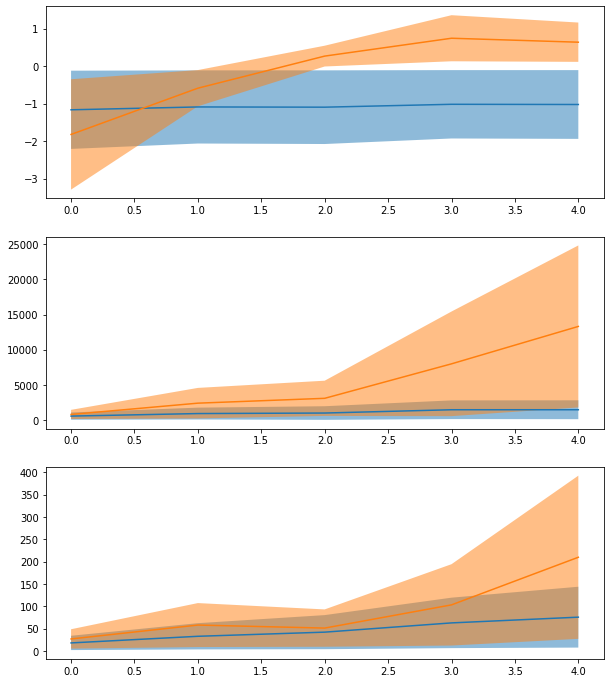

In [ ]:
plt.figure(figsize=(10, 12))

for i, v in enumerate(['p', 's', 'i']):
    plt.subplot(311 + i)
    plt.plot(vanilla[f'{v}_mean'])
    plt.fill_between(
        np.arange(5),
        vanilla[f'{v}_inf'],
        vanilla[f'{v}_sup'],
        alpha = 0.5)
    plt.plot(lifelong[f'{v}_mean'])
    plt.fill_between(
        np.arange(5),
        lifelong[f'{v}_inf'],
        lifelong[f'{v}_sup'],
        alpha = 0.5)

In [ ]:
p = list()
for i in range(5):
    aux = list()
    for v in vanilla:
        aux += [v[(v.cena == i) & (v.parte == 'train')].perda.mean()]
    p += [aux]
np.mean(p, 1)

array([-4.09874098, -3.87192769, -3.8675933 , -3.67782765, -3.52697492])

In [ ]:
A.loc[
    (A.modelo == 'arcnet') & (A.parte == 'train'),
    ['cena', 'perda']].groupby('cena').mean()

perda
cena          
0    -4.102780
1    -1.096469

In [ ]:
with open(f'/home/aislan/Downloads/agent00_1.pickle', 'rb') as handle:
    prev = pickle.load(handle)

A = pd.DataFrame({'raw': prev['agent']['set']['safe']})
A = A.apply(data_part, 1).astype({
    'cena': 'int',
    'execucao': 'int',
    'perda': 'float',
    'tempo': 'float',
    'solucoes': 'int'})
A.shape

(924, 8)

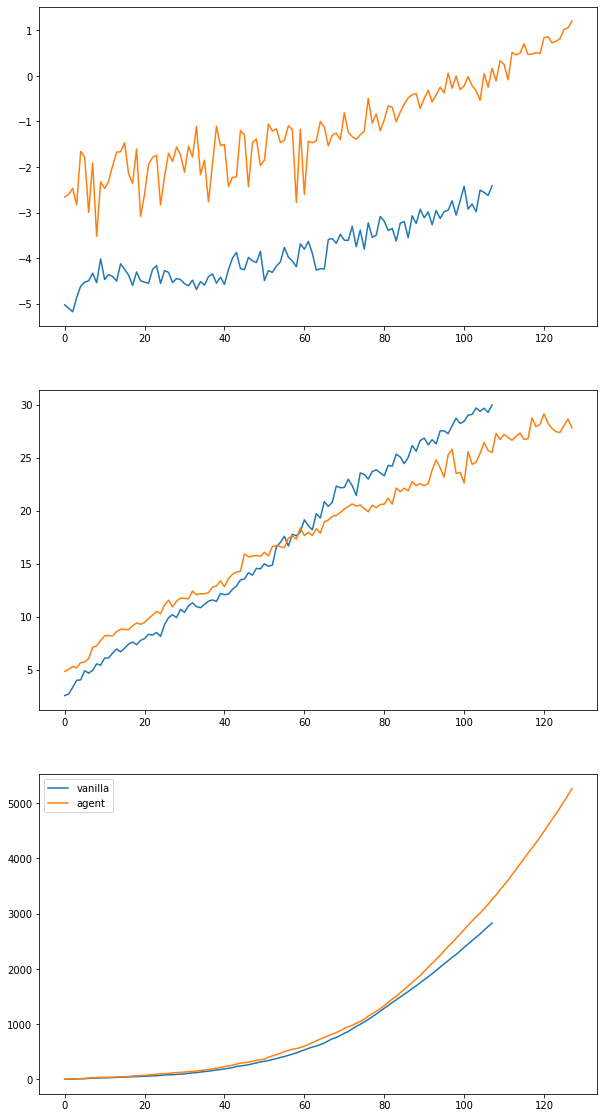

In [ ]:
cena = 1

v = vanilla[2].loc[
    (vanilla[2].cena == cena) & (vanilla[2].parte == 'train'),
    ['perda', 'tempo', 'solucoes']]
a = A.loc[
    (A.cena == cena) & (A.modelo == 'arcnet') & (A.parte == 'train'),
    ['perda', 'tempo', 'solucoes']]

plt.figure(figsize=(10, 20))
plt.subplot(311)
plt.plot(np.arange(len(v)), v.perda)
plt.plot(np.arange(len(a)), a.perda)

plt.subplot(312)
plt.plot(np.arange(len(v)), v.tempo)
plt.plot(np.arange(len(a)), a.tempo)

plt.subplot(313)
plt.plot(np.arange(len(v)), v.solucoes)
plt.plot(np.arange(len(a)), a.solucoes)

plt.legend(labels=['vanilla', 'agent'])
plt.show()

In [ ]:
vanilla = list()

for i in range(2):
    da = get_data(i, True)

    aux = list()
    for j in range(5):
        aux += [len(da[(da.cena == j) & (da.modelo == 'arcnet') & (da.parte == 'train')])]
    vanilla += [aux]

vanilla = np.array(vanilla)

mean_vanilla = vanilla.mean(0)
bot_vanilla, top_vanilla = st.t.interval(
    0.95, 29,
    loc=vanilla.mean(0),
    scale=st.sem(vanilla))


In [ ]:
lifelong = list()

for i in range(4):
    da = get_data(i)

    aux = list()
    for j in range(5):
        aux += [len(da[(da.cena == j) & (da.modelo == 'arcnet') & (da.parte == 'train')])]
    lifelong += [aux]

lifelong = np.array(lifelong)

mean_lifelong = lifelong.mean(0)
bot_lifelong, top_lifelong = st.t.interval(
    0.95, 29,
    loc=lifelong.mean(0),
    scale=st.sem(lifelong))


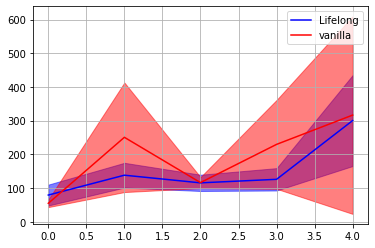

In [ ]:
plt.plot(np.arange(5), mean_lifelong, c='b', label='Lifelong')
plt.fill_between(np.arange(5), bot_lifelong, top_lifelong, color='b', alpha=0.5)

plt.plot(np.arange(5), mean_vanilla, c='r', label='vanilla')
plt.fill_between(np.arange(5), bot_vanilla, top_vanilla, color='r', alpha=0.5)

plt.grid()
plt.legend()
plt.show()

# Prova

In [ ]:
exps = 30
lifelong = np.zeros((exps, 5, 5))

for exp in range(exps):
    for env in range(5):
        aux = agent.load_me(f'{exp:02d}_{env}', Environment(1), False)
        for stp in range(5):
            aprint(f'{(exp * 5 * 5 + env * 5 + stp) / exps / 5 / 5:.3f}', False)
            aux.set_env(Environment(stp+1))

            lifelong[exp, env, stp] = aux.env_recall(False)

aprint('Done')

0.999
Done


In [ ]:
stt_top = np.zeros((5, 5))
stt_bot = np.zeros((5, 5))

for i in range(5):
    for j in range(5):
        a, b = st.t.interval(
            0.95, 29,
            loc = lifelong[:, i, j].mean(),
            scale = st.sem(lifelong[:, i, j]))
        stt_bot[i, j] = a
        stt_top[i, j] = b


In [ ]:
stt_mean = (stt_top + stt_bot) / 2
stt_mean, stt_top - stt_mean

(array([[9.220072  , 8.78403   , 8.60401193, 8.2916307 , 8.22799323],
        [9.220072  , 9.34876852, 9.10329515, 8.86980043, 8.64524504],
        [9.220072  , 9.34876853, 9.27648578, 8.94924394, 8.77951798],
        [9.220072  , 9.34876853, 9.2764858 , 9.019749  , 8.81116895],
        [9.17991926, 9.34876853, 9.27648579, 9.019749  , 8.80681934]]),
 array([[0.04947919, 0.06810789, 0.11886941, 0.11126988, 0.14563997],
        [0.04947918, 0.04598574, 0.11359721, 0.07765572, 0.10805437],
        [0.04947918, 0.04598574, 0.06038866, 0.09008075, 0.08261787],
        [0.04947918, 0.04598575, 0.06038867, 0.05976656, 0.09119936],
        [0.08008435, 0.04598575, 0.06038866, 0.05976655, 0.07526499]]))

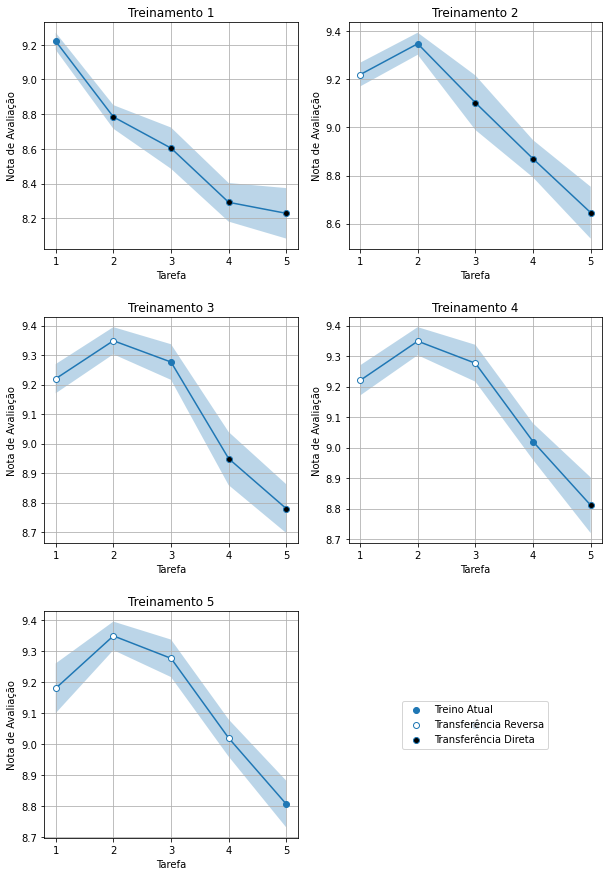

In [ ]:
plt.figure(figsize=(10, 15))
plt.subplots_adjust(hspace=0.3)

for i in range(5):
    plt.subplot(321 + i)
    plt.title(f'Treinamento {i + 1}')
    plt.ylabel('Nota de Avaliação')
    plt.xlabel('Tarefa')

    sm = lifelong[:, i, :].mean(0)
    plt.plot(np.arange(5), sm)
    plt.fill_between(np.arange(5), stt_bot[i], stt_top[i], alpha=0.3)

    if i > 0:
        plt.scatter(np.arange(i), sm[:i], edgecolors='#1f77b4', color='w', zorder=1000, label='Transferência Reversa')
    plt.scatter(i, sm[i], edgecolors='#1f77b4', color='#1f77b4', zorder=1000, label='Treino Atual')
    if i < 4:
        plt.scatter(np.arange(i+1, 5), sm[i+1:], edgecolors='#1f77b4', color='k', zorder=1000, label='Transferência Direta')

    plt.xticks(np.arange(0, 5), np.arange(1, 6))
    plt.grid()

plt.subplot(326)
plt.scatter([0], [0], edgecolors='#1f77b4', color='#1f77b4', label='Treino Atual')
plt.scatter([0], [0], edgecolors='#1f77b4', color='w', label='Transferência Reversa')
plt.scatter([0], [0], edgecolors='#1f77b4', color='k', label='Transferência Direta')
plt.legend(loc='center')
plt.axis('off')
plt.show()

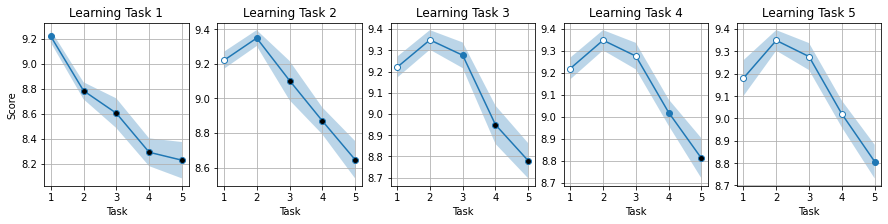

In [ ]:
plt.figure(figsize=(15, 3))
# plt.subplots_adjust(hspace=0.3)

for i in range(5):
    plt.subplot(151 + i)
    plt.title(f'Learning Task {i + 1}')
    if i == 0:
        plt.ylabel('Score')
    plt.xlabel('Task')

    sm = lifelong[:, i, :].mean(0)
    plt.plot(np.arange(5), sm)
    plt.fill_between(np.arange(5), stt_bot[i], stt_top[i], alpha=0.3)

    if i > 0:
        plt.scatter(np.arange(i), sm[:i], edgecolors='#1f77b4', color='w', zorder=1000, label='Transferência Reversa')
    plt.scatter(i, sm[i], edgecolors='#1f77b4', color='#1f77b4', zorder=1000, label='Treino Atual')
    if i < 4:
        plt.scatter(np.arange(i+1, 5), sm[i+1:], edgecolors='#1f77b4', color='k', zorder=1000, label='Transferência Direta')

    plt.xticks(np.arange(0, 5), np.arange(1, 6))
    plt.grid()

# plt.subplot(326)
# plt.scatter([0], [0], edgecolors='#1f77b4', color='#1f77b4', label='Treino Atual')
# plt.scatter([0], [0], edgecolors='#1f77b4', color='w', label='Transferência Reversa')
# plt.scatter([0], [0], edgecolors='#1f77b4', color='k', label='Transferência Direta')
# plt.legend(loc='center')
# plt.axis('off')
plt.show()

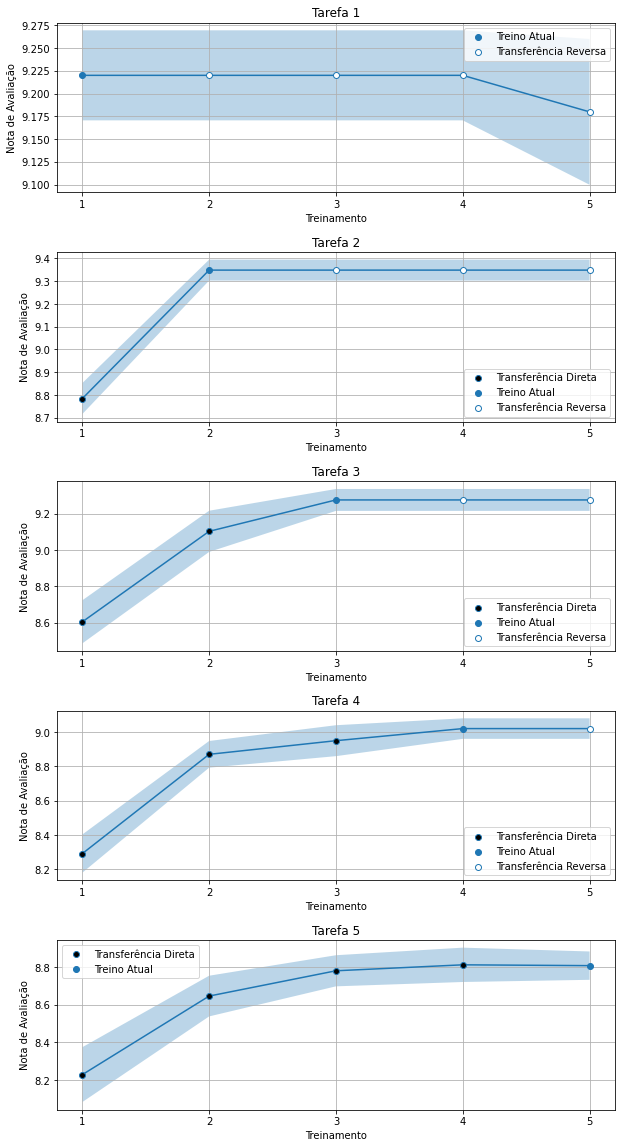

In [ ]:
plt.figure(figsize=(10, 20))
plt.subplots_adjust(hspace=0.35)

for i in range(5):
    plt.subplot(511 + i)
    plt.title(f'Tarefa {i + 1}')
    plt.ylabel('Nota de Avaliação')
    plt.xlabel('Treinamento')

    sm = lifelong[:, :, i].mean(0)
    plt.plot(np.arange(5), sm)
    plt.fill_between(np.arange(5), stt_bot[:, i], stt_top[:, i], alpha=0.3)

    if i > 0:
        plt.scatter(np.arange(i), sm[:i], edgecolors='#1f77b4', color='k', zorder=1000, label='Transferência Direta')
    plt.scatter(i, sm[i], edgecolors='#1f77b4', color='#1f77b4', zorder=1000, label='Treino Atual')
    if i < 4:
        plt.scatter(np.arange(i+1, 5), sm[i+1:], edgecolors='#1f77b4', color='w', zorder=1000, label='Transferência Reversa')

    plt.legend()
    
    plt.xticks(np.arange(0, 5), np.arange(1, 6))
    plt.grid()
plt.show()

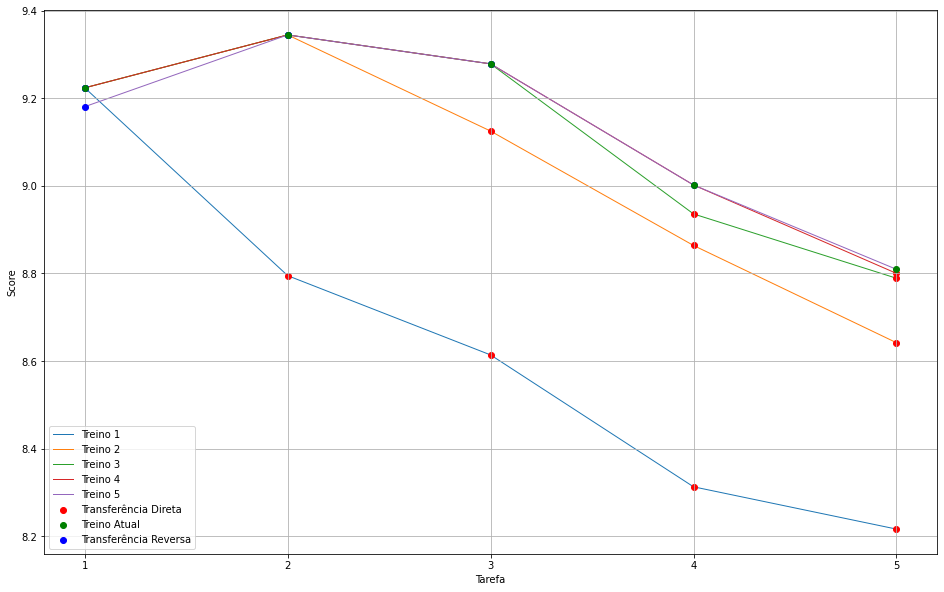

In [ ]:
aux = lifelong.mean(0)
aux_ft = [(j, aux[i, j]) for i in range(5) for j in range(5) if j > i]
aux_bt = [(j, aux[i, j]) for i in range(5) for j in range(5) if j < i]
aux_nt = [(j, aux[i, j]) for i in range(5) for j in range(5) if j == i]

plt.figure(figsize=(16, 10))
for i in range(5):
    plt.plot(np.arange(1, 6), aux[i], lw=1, label=f'Treino {i+1}', zorder=0)
plt.scatter([x[0] + 1 for x in aux_ft], [x[1] for x in aux_ft], c='r', label='Transferência Direta', zorder=1)
plt.scatter([x[0] + 1 for x in aux_nt], [x[1] for x in aux_nt], c='g', label='Treino Atual', zorder=3)
plt.scatter([x[0] + 1 for x in aux_bt], [x[1] for x in aux_bt], c='b', label='Transferência Reversa', zorder=2)

plt.xlabel('Tarefa')
plt.ylabel('Score')
plt.xticks([1, 2, 3, 4, 5])
plt.legend(loc=3)
plt.grid()
plt.show()

In [ ]:
baseline = list()
for i in range(5):
    y = np.load(f'/content/drive/MyDrive/Colab Notebooks/Y{i}.npy')
    baseline += [np.mean(y)]
np.round(baseline, 2)

array([4.97, 4.9 , 4.75, 4.78, 5.11])

In [ ]:
def load_me(code: str, env: tp.Any, vanilla: bool = False) -> tp.Any:
    if vanilla:
        name = f'vanilla{code}'
    else:
        name = f'agent{code}'

    # with open(f'{global_folder}/{name}.pickle', 'rb') as handle:
    with open(f'/home/aislan/Downloads/{name}.pickle', 'rb') as handle:
        prev = pickle.load(handle)

    prev['agent']['attributes']['agent_code'] = code
    prev['agent']['attributes']['environment_class'] = env

    new = agent(vanilla, **prev['agent']['attributes'])
    for k, v in prev['agent']['set'].items():
        setattr(new, k, v)

    for k, v in prev['arcnet']['attributes'].items():
        setattr(new.modelo, k, v)

    new.modelo.opt = agent.rebuild_opt(
        prev['arcnet']['attributes']['weights'],
        prev['arcnet']['rebuild']['opt'])

    for k, v in prev['ae']['attributes'].items():
        setattr(new.ae, k, v)

    for k, v in prev['memory']['attributes'].items():
        setattr(new.memory, k, v)
    
    for selector, vals in zip(new.selectors, prev['selector']):
        for k, v in vals['attributes'].items():
            setattr(selector, k, v)

        aux = [
            vals['attributes']['weights'],
            vals['attributes']['bias']]

    env = int(new.safe[-1].split(':')[0]) + 1
    new.set_env(Environment(env))

    return new


In [ ]:
outer = list()
for C in range(1):
    out = list()
    for B in range(5):
        A = load_me(f'{str(C).zfill(2)}_{B}', Environment(1), False)
        a = list()

        for Z in range(5):
            X = tf.constant(np.load(f'X{Z}.npy'), A.agent_tf_dtype)
            Y = tf.constant(np.load(f'Y{Z}.npy'), A.agent_tf_dtype)

            A.set_env(Environment(Z+1))
            y = tf.constant(
                A.env_description(),
                A.agent_tf_dtype)
            # print(y)
            y = A.ae.encode(y)
            # print(y)
            masks = [s.predict_selector(
                y, A.selector_threshold) for s in A.selectors]
            masks += [tf.ones_like(A.modelo.weights[-1])]
            # print(masks)
            # print('---')

            A.memory.predict_masks = masks

            yp = A.memory.predict(X)

            Yx = Y - (tf.reduce_max(Y, 1, True) - 10)

            df = pd.DataFrame(
                Yx.numpy(),
                columns=['_', 'r', 'y', 'g', 'c', 'b', 'm'])
            df['-'] = ''
            ds = pd.DataFrame(
                np.round((Yx * yp).numpy(), 2),
                columns=['X', 'R', 'Y', 'G', 'C', 'B', 'M'])
            ds['+'] = ''
            df = pd.concat([df, ds], axis=1)
            df['total'] = np.round(tf.reduce_sum(Yx * yp, 1).numpy(), 2)
            a += [df.total.mean()]
        out += [a]
    outer += [out]

outer = np.array(outer)

{0: [9.461399, 8.970401, 8.539801, 8.3646, 8.1888]}

## Construção

In [ ]:
level = 5
env = Environment(level)
pt = list()
for i in range(20):
    aux = [i]
    for j in range(20):
        aux1 = aux + [j]
        if level == 1:
            pt += [tuple(aux1)]
            continue
        for k in range(j+1, 20):
            aux2 = aux1 + [k]
            if level == 2:
                pt += [tuple(aux2)]
                continue
            for l in range(k + 1, 20):
                aux3 = aux2 + [l]
                if level == 3:
                    pt += [tuple(aux3)]
                    continue
                for m in range(l + 1, 20):
                    aux4 = aux3 + [m]
                    if level == 4:
                        pt += [tuple(aux4)]
                        continue
                    for n in range(m + 1, 20):
                        aux5 = aux4 + [n]
                        if level == 5:
                            pt += [tuple(aux5)]
                            continue
pt = np.random.permutation(pt)

13 [ 1  2  7  8 13] []


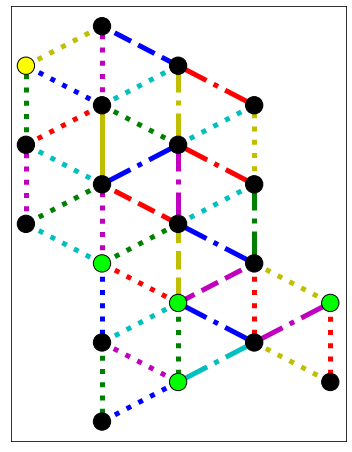


    8
10     6
    8     4
 8     6
    6     2
 6     2
    4     8
       2    10
    2     6
       4     8
    2



In [ ]:
w = 4
s = 0

env.pos = pt[len(Y) + w][0]
env.target = pt[len(Y) + w][1:]
env.stamps = np.random.permutation(env.target)[:s].tolist()
print(env.pos, env.target, env.stamps)
env.show()

new_target = list(set(env.target) - set(env.stamps))
z = np.full((len(new_target), 20), np.NINF)
for j, k in enumerate(new_target):
    z[j, k] = 0

    while True:
        init = 1 * z[j]
        for i in range(20):
            idx = (env.conns.s1 == i) | (env.conns.s2 == i)
            for _, (A, B, R, _) in env.conns[idx].iterrows():
                if A == i:
                    s = B
                else:
                    s = A

                z[j, s] = max(z[j, s], z[j, i] - 2 * R)

        if np.all(z[j] == init):
            break

### FIVES
if len(new_target) == 5:
    zx = None
    for a in range(5):
        for b in range(5):
            for c in range(5):
                for d in range(5):
                    for e in range(5):
                        if len(set([a, b, c, d, e])) < 5:
                            continue
                        if zx is None:
                            zx = z[a] + z[b,  new_target[a]] + z[c, new_target[b]] + z[d, new_target[c]] + z[e, new_target[d]] + 10
                        else:
                            zx = np.maximum(zx,
                                z[a] + z[b,  new_target[a]] + z[c, new_target[b]] + z[d, new_target[c]] + z[e, new_target[d]] + 10)

### FOURS
if len(new_target) == 4:
    zx = None
    for a in range(4):
        for b in range(4):
            for c in range(4):
                for d in range(4):
                    if a == b or a == c or a == d or b == c or b == d or c == d:
                        continue
                    if zx is None:
                        zx = z[a] + z[b, new_target[a]] + z[c, new_target[b]] + z[d, new_target[c]] + 10
                    else:
                        zx = np.maximum(zx,
                            z[a] + z[b, new_target[a]] + z[c, new_target[b]] + z[d, new_target[c]] + 10)

### THREES
if len(new_target) == 3:
    zx = z[0] + z[1, new_target[0]] + z[2, new_target[1]] + 10
    zx = np.maximum(zx,
        z[0] + z[2, new_target[0]] + z[1, new_target[2]] + 10)
    zx = np.maximum(zx,
        z[1] + z[0, new_target[1]] + z[2, new_target[0]] + 10)
    zx = np.maximum(zx,
        z[1] + z[2, new_target[1]] + z[0, new_target[2]] + 10)
    zx = np.maximum(zx,
        z[2] + z[0, new_target[2]] + z[1, new_target[0]] + 10)
    zx = np.maximum(zx,
        z[2] + z[1, new_target[2]] + z[0, new_target[1]] + 10)

### TWOS
if len(new_target) == 2:
    za = z[0] + z[1, new_target[0]] + 10
    zb = z[1] + z[0, new_target[1]] + 10
    zx = np.maximum(za, zb)

### ONES
if len(new_target) == 1:
    zx = z[0] + 10

zx += 10 - zx[env.pos]

print(f'''
   {zx[19]:2.0f}
{zx[13]:2.0f}    {zx[16]:2.0f}
   {zx[12]:2.0f}    {zx[18]:2.0f}
{zx[10]:2.0f}    {zx[15]:2.0f}
   {zx[6]:2.0f}    {zx[14]:2.0f}
{zx[9]:2.0f}    {zx[0]:2.0f}
   {zx[2]:2.0f}    {zx[3]:2.0f}
      {zx[1]:2.0f}    {zx[8]:2.0f}
   {zx[4]:2.0f}    {zx[5]:2.0f}
      {zx[7]:2.0f}    {zx[17]:2.0f}
   {zx[11]:2.0f}
''')

In [ ]:
y = [0, 10,  8,  8,  0,  9,  7]
#    _   r   y   g   c   b   m
x = env.obs()

X += [x]
Y += [y]
np.array(Y).shape

(50, 7)

In [ ]:
X = list()
Y = list()

# np.save('X4', X)
# np.save('Y4', Y)

In [ ]:
   19
13    16
   12    18
10    15
   06    14
09    00
   02    03
      01    08
   04    05
      07    17
   11

In [ ]:
np.mean([[3, 5, 8, 17], 8
[1, 4, 7, 11], 7
[2, 6, 9, 10], 6
[14, 15, 16, 18]] 16, 1, ), np.mean([12, 13, 19]) 14

(array([ 8.25,  5.75,  6.75, 15.75]), 14.666666666666666)

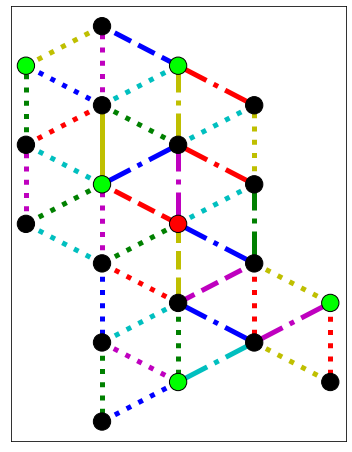

In [ ]:
env = Environment(1)
env.pos = 0
env.target = [6, 7, 8, 13, 16]
env.stamps = []
env.show()

In [ ]:
vec = list()
poss = [
    [0, 0, 0, 0, 0],
    [0, 6, 0, 8, 0],
    [0, 6, 7, 0, 13],
    [0, 6, 7, 8, 0],
    [0, 6, 7, 8, 13]][env.level - 1]

tgts = [
    [[6], [7], [8], [13], [16]],
    [[6, 7], [6, 7], [8, 13], [8, 13], [16, 4]],
    [[6, 7, 8], [6, 7, 8], [6, 7, 8], [13, 16, 4], [13, 16, 4]],
    [[6, 7, 8, 13], [6, 7, 8, 13], [6, 7, 8, 13], [6, 7, 8, 13], [16, 4, 18, 17]],
    [[6, 7, 8, 13, 16], [6, 7, 8, 13, 16], [6, 7, 8, 13, 16], [6, 7, 8, 13, 16], [6, 7, 8, 13, 16]]
    ][env.level - 1]

stps = [
    [[], [], [], [], []],
    [[], [6], [], [8], []],
    [[], [6], [6, 7], [], [13]],
    [[], [6], [6, 7], [6, 7, 8], []],
    [[], [6], [6, 7], [6, 7, 8], [6, 7, 8, 13]]][env.level - 1]

for i in range(5):
    env.pos = poss[i]
    env.target = np.array(tgts[i])
    env.stamps = stps[i]
    vec += env.obs()

tf.constant([vec], dtype=tf.float16)

<tf.Tensor: shape=(1, 300), dtype=float16, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
        0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        1., 0.

In [ ]:
env = Environment(5)

In [ ]:
y = np.load('Y0.npy').flatten()

In [ ]:
A = load_me('01', Environment(1), True)

In [ ]:
X = tf.constant(np.load('X4.npy'), A.agent_tf_dtype)
Y = np.load('Y4.npy')

In [ ]:
yp = A.modelo.predict(X).numpy()

In [ ]:
# i = 0
i += 1
print(i)
print(Y[i])
print(np.round(yp[i]))
print(np.round(np.exp(yp[i]) / np.sum(np.exp(yp[i])), 2))

25
[ 0  0  9  9  0 10  0]
[-11. -11.  -3.  -3. -11.  -2. -11.]
[0.   0.   0.22 0.21 0.   0.56 0.  ]


In [ ]:
yz = np.exp(yp) / np.sum(np.exp(yp), 1, keepdims=True)
np.sum(Y * yz) / 50

9.343255226499213

# TAMANHO

In [ ]:
y = list()
for i in range(3):
    z = list()
    for scn in range(5):
        aux = agent.load_me('00', Environment(1), False)
        df = safe_to_dataframe(aux.safe).reset_index()
        df['parametros'] = 0
        idx = (df.cena == scn) & (df.modelo == 'memory') & (
            (df.parte == 'train') | (df.parte == 'add') | (df.parte == 'combine') | (df.parte == 'remove'))
        # df.loc[idx, 'parametros'] = df.topologia.apply(topology_to_parameters(60), 1)
        df.loc[idx, 'parametros'] = df.topologia.apply(lambda x: int(x[1:-1].split(', ')[0]))
        dx = df.loc[idx, ['index', 'cena', 'parte', 'execucao', 'parametros']]
        dx = dx.groupby(['cena', 'parte', 'execucao'], as_index=False).agg({
            'index': 'min',
            'parametros': 'mean'})
        dx = dx.sort_values('index')
        z += [dx['parametros'].values]
    y += [z]

dx['color'] = dx.apply(lambda x: {
    'train': 'b',
    'remove': 'r',
    'combine': 'y',
    'add': 'g'}[x.parte], 1)


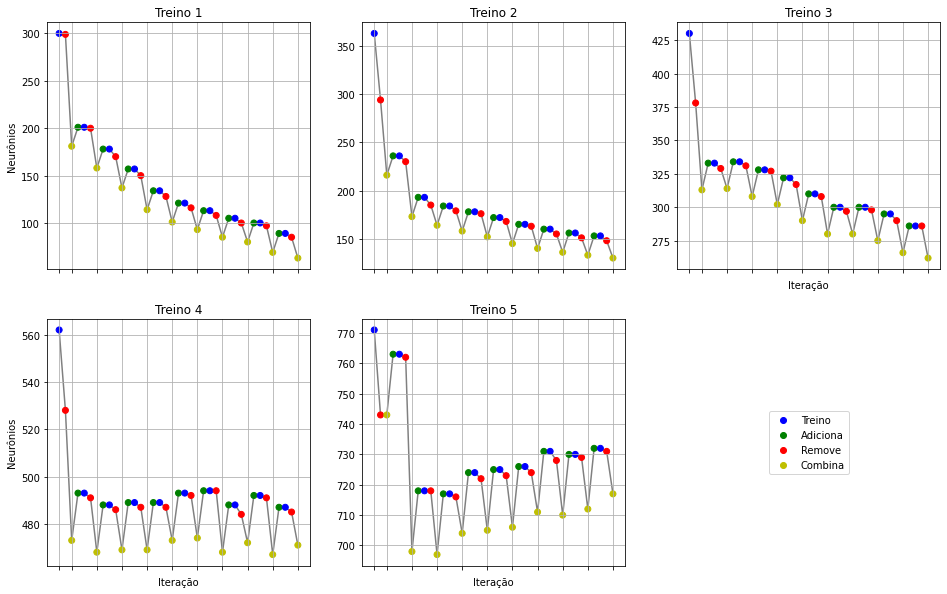

In [ ]:
plt.figure(figsize=(16, 10))

for scn in range(5):
    plt.subplot(231 + scn)
    plt.title(f'Treino {scn + 1}')
    aux = np.mean([y[i][scn] for i in range(2)], 0)
    plt.plot(aux, c='gray', zorder=0)
    plt.scatter(np.arange(len(aux)), aux, c=dx.color.values, zorder=1)
    plt.grid()
    plt.xticks([0] + list(range(2, 39, 4)), [])
    if scn in (0, 3):
        plt.ylabel('Neurônios')
    if scn > 1:
        plt.xlabel('Iteração')

plt.subplot(236)
plt.scatter(None, None, c='b', label='Treino')
plt.scatter(None, None, c='g', label='Adiciona')
plt.scatter(None, None, c='r', label='Remove')
plt.scatter(None, None, c='y', label='Combina')
plt.legend(loc='center')
plt.axis('off')
plt.show()

In [ ]:
def topology_to_parameters(inputs: int):
    def fun(topology: str):
        vec = [inputs] + topology[1:-1].split(', ')
        return np.sum([
            (int(vec[i]) + 1) * int(vec[i + 1]) for i in range(len(vec) - 1)])
    return fun


In [ ]:
y = list()
for i in range(3):
    z = list()
    for scn in range(5):
        aux = agent.load_me('00', Environment(1), False)
        df = safe_to_dataframe(aux.safe).reset_index()
        df['parametros'] = 0
        idx = (df.cena == scn) & (df.modelo == 'ae') & (
            (df.parte == 'train') | (df.parte == 'add') | (df.parte == 'combine') | (df.parte == 'remove'))
        df.loc[idx, 'parametros'] = df.topologia.apply(topology_to_parameters(20), 1)
        # df.loc[idx, 'parametros'] = df.topologia.apply(lambda x: int(x[1:-1].split(', ')[0]))
        dx = df.loc[idx, ['index', 'cena', 'parte', 'execucao', 'parametros']]
        dx = dx.groupby(['cena', 'parte', 'execucao'], as_index=False).agg({
            'index': 'min',
            'parametros': 'mean'})
        dx = dx.sort_values('index')
        z += [dx['parametros'].values]
    y += [z]

dx['color'] = dx.apply(lambda x: {
    'train': 'b',
    'remove': 'r',
    'combine': 'y',
    'add': 'g'}[x.parte], 1)


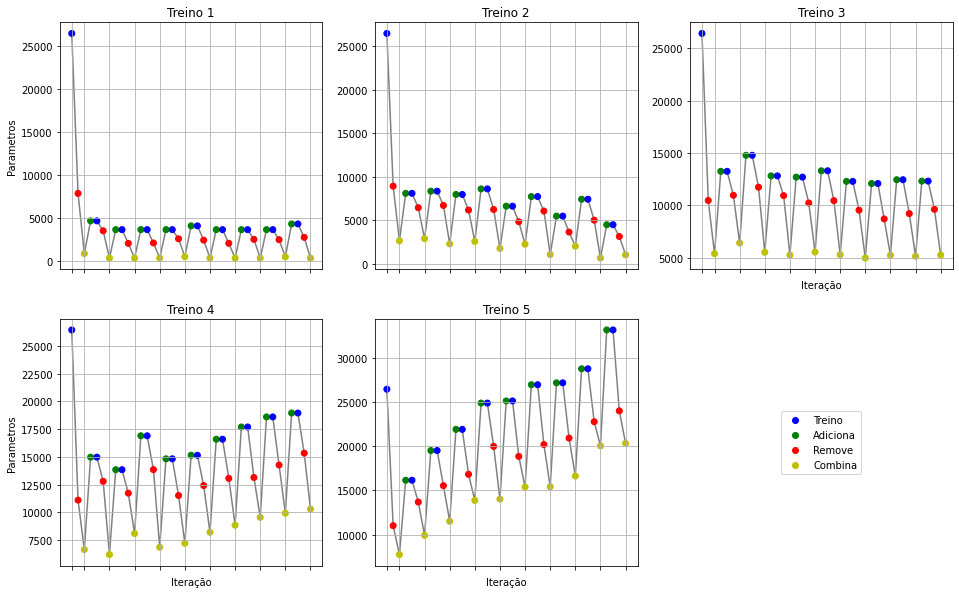

In [ ]:
plt.figure(figsize=(16, 10))

for scn in range(5):
    plt.subplot(231 + scn)
    plt.title(f'Treino {scn + 1}')
    aux = np.mean([y[i][scn] for i in range(2)], 0)
    plt.plot(aux, c='gray', zorder=0)
    plt.scatter(np.arange(len(aux)), aux, c=dx.color.values, zorder=1)
    plt.grid()

    plt.xticks([0] + list(range(2, 39, 4)), [])
    if scn in (0, 3):
        plt.ylabel('Parametros')
    if scn > 1:
        plt.xlabel('Iteração')

plt.subplot(236)
plt.scatter(None, None, c='b', label='Treino')
plt.scatter(None, None, c='g', label='Adiciona')
plt.scatter(None, None, c='r', label='Remove')
plt.scatter(None, None, c='y', label='Combina')
plt.legend(loc='center')
plt.axis('off')
plt.show()

In [ ]:
df[(df.modelo == 'memory') & (df.parte == 'train')].head(20)

cena  modelo  parte  execucao  ...      tempo  solucoes  score  parametros
152     0  memory  train         0  ...  11.983470         0    0.0        8407
153     0  memory  train         0  ...  11.691087         0    0.0        8407
154     0  memory  train         0  ...  11.916518         0    0.0        8407
155     0  memory  train         0  ...  11.266688         0    0.0        8407
156     0  memory  train         0  ...  10.805247         0    0.0        8407
157     0  memory  train         0  ...  10.946924         0    0.0        8407
158     0  memory  train         0  ...  11.512158         0    0.0        8407
159     0  memory  train         0  ...  11.179067         0    0.0        8407
160     0  memory  train         0  ...  11.218710         0    0.0        8407
161     0  memory  train         0  ...  10.398717         0    0.0        8407
162     0  memory  train         0  ...  10.982896         0    0.0        8407
163     0  memory  train         0  ...  11.120363         0    0.0        8407
164     0  memory  train         0  ...  10.921930         0    0.0        8407
165     0  memory  train         0  ...  11.331642         0    0.0        8407
170     0  memory  train         1  ...   8.030983         0    0.0        5439
171     0  memory  train         1  ...   8.211728         0    0.0        5439
172     0  memory  train         1  ...   7.948487         0    0.0        5439
173     0  memory  train         1  ...   8.289062         0    0.0        5439
174     0  memory  train         1  ...   8.564104         0    0.0        5439
175     0  memory  train         1  ...   8.341923         0    0.0        5439

[20 rows x 10 columns]

In [ ]:
df.parte.unique()

array(['train', 'finished', 'save', 'remove', 'combine', 'add', 'arcnet'],
      dtype=object)

In [ ]:
df = safe_to_dataframe(A.safe)

In [ ]:
df['parametros'] = None

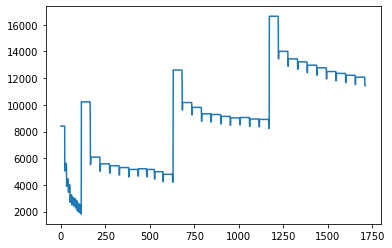

In [ ]:
idx = (df.cena >= 0) & (df.modelo == 'memory')
df.loc[idx, 'parametros'] = df.topologia.apply(topology_to_parameters(20), 1)
y = df.loc[idx, 'parametros'].values
plt.plot(y)
plt.show()

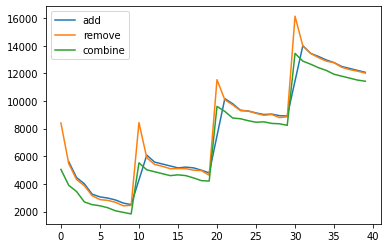

In [ ]:
for pt in ['add', 'remove', 'combine']:
    idxn = idx & (df.parte == pt)
    y = df.loc[idxn, 'parametros'].values
    x = 10 * df.loc[idxn, 'cena'].values + df.loc[idxn, 'execucao'].values
    plt.plot(x, y, label=pt)
plt.legend()
plt.show()

In [ ]:
df[idx].columns

Index(['cena', 'modelo', 'parte', 'execucao', 'topologia', 'perda', 'tempo',
       'solucoes', 'parametros'],
      dtype='object')

In [ ]:
env = Environment(1)

In [ ]:
print(',\n'.join([f'{i}/{np.round(b, 3)}/{np.round(a, 3)}' for i, (a, b) in enumerate(env.graph)]))

0/0/0,
1/-1/0,
2/-0.5/-0.866,
3/-0.5/0.866,
4/-1.5/-0.866,
5/-1.5/0.866,
6/0.5/-0.866,
7/-2/0,
8/-1.0/1.732,
9/0.0/-1.732,
10/1.0/-1.732,
11/-2.5/-0.866,
12/1.5/-0.866,
13/2.0/-1.732,
14/0.5/0.866,
15/1/0,
16/2/0,
17/-2.0/1.732,
18/1.5/0.866,
19/2.5/-0.866


In [ ]:
acts = ['A', 'B', 'C', 'D', 'E', 'F']
print(',\n'.join([f'{A}/{B}/{-C}/{acts[D]}' for A, B, C, D in env.conns.values]))

0/15/-3/F,
0/14/-1/D,
0/3/-3/E,
0/1/-6/B,
0/2/-1/C,
0/6/-6/A,
1/3/-6/F,
1/5/-3/E,
1/7/-1/C,
1/4/-1/D,
1/2/-1/A,
2/6/-1/F,
2/4/-1/E,
2/9/-1/D,
3/14/-3/C,
3/8/-1/B,
3/5/-1/A,
4/7/-1/F,
4/11/-1/C,
5/8/-3/F,
5/17/-1/B,
5/7/-3/D,
6/12/-10/B,
6/15/-3/E,
6/9/-1/C,
6/10/-1/D,
7/11/-1/E,
8/17/-1/A,
9/10/-1/F,
10/13/-1/C,
10/12/-1/A,
12/19/-1/F,
12/16/-1/D,
12/15/-1/C,
12/13/-1/E,
13/19/-1/B,
14/18/-1/B,
14/15/-3/A,
15/16/-3/B,
15/18/-1/D,
16/18/-3/A,
16/19/-6/E


In [ ]:
A = load_me('00', Environment(1))

2021-08-13 22:33:40.508494: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-08-13 22:33:40.508540: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-08-13 22:33:40.508571: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (acerkub): /proc/driver/nvidia/version does not exist
2021-08-13 22:33:40.509515: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
X = tf.constant(np.load('X0.npy'), A.agent_tf_dtype)
Y = np.load('Y0.npy')

yp = A.modelo.predict(X)

out = 0
for i, a in enumerate(tf.argmax(yp, 1)):
    print(yp[i])
    print(yp[i, a])
    print(Y[i])
    print(Y[i, a])
    print('----')
    out += Y[i, a]

out / 50

tf.Tensor(
[-26.995632   -5.801468  -10.062784    1.6154606   2.4774132  -3.3946047
  11.832801 ], shape=(7,), dtype=float32)
tf.Tensor(11.832801, shape=(), dtype=float32)
[ 0  4 -2  9  8  4 10]
10
----
tf.Tensor(
[-30.443485  -12.904456   -3.7818484   7.231687    1.8474212 -12.231702
   6.510553 ], shape=(7,), dtype=float32)
tf.Tensor(7.231687, shape=(), dtype=float32)
[ 0  0  0 10  9  0  9]
10
----
tf.Tensor(
[-14.202142     0.22102475  12.581469     0.10783789  -8.985028
   1.3862687   -2.4713728 ], shape=(7,), dtype=float32)
tf.Tensor(12.581469, shape=(), dtype=float32)
[ 0  8 10  6  0  4  0]
10
----
tf.Tensor(
[-43.437447 -20.83002   -4.857927 -17.14578  -14.977098 -16.534983
  -7.512085], shape=(7,), dtype=float32)
tf.Tensor(-4.857927, shape=(), dtype=float32)
[ 0  0  9  0  0  4 10]
9
----
tf.Tensor(
[-28.265675   -15.192313    -0.19873092  -4.5021176  -10.800776
  -8.382989    -9.293522  ], shape=(7,), dtype=float32)
tf.Tensor(-0.19873092, shape=(), dtype=float32)
[ 0  0  8 10  

9.46

# TESTES

In [ ]:
np.random.randint(12, size=4)

array([7, 5, 6, 7])

In [ ]:
    519     639     759     879     999
408     528     648     768     888
    417     537     657     777     997
306     426     546     666     886
    315     435     555     775     995
204     324     444     664     884
    213     333     553     773     993
102     222     442     662     882
    111     331     551     771     991
000     220     440     660     880

In [ ]:
dist = 0
pos = [0, 0]

In [ ]:
a = np.random.randint(6)
a

0

In [ ]:
m = [[0, 2], [1, 1], [1, -1], [0, -2], [-1, -1], [-1, 1]][a]
m

[0, 2]

In [ ]:
pos = [pos[0] + m[0], pos[1] + m[1]]
pos

[4, -2]

In [ ]:
aux_dist = abs(pos[0]) if abs(pos[0]) >= abs(pos[1]) else (abs(pos[0]) + abs(pos[1])) // 2
dist = max(aux_dist, dist)
aux_dist, dist

(4, 4)

In [ ]:
w -> nada acontece
k -> volta do inicio
r -> perde 1 de vida
y -> ganha recompensa
g -> ganha 1 de vida
b -> não passa

In [ ]:
def fun(pos, seed):
    aux = f'{pos[0]}x{pos[1]}x{seed}'
    h = hashlib.sha1(b(aux)).hexdigest()
    return int(h[-4:], 16) / int('10000', 16)


def distance(pos):
    if abs(pos[0]) >= abs(pos[1]):
        return abs(pos[0])
    return (abs(pos[0]) + abs(pos[1])) // 2 


def color(pos, dist, vec, seed):
    if dist > distance(pos):
        return 'gray'

    if (pos[0] == 0) and (pos[1] == 0):
        return 'k'

    P = [97 - sum(vec)] + vec + [3]

    v = 100 * fun(pos, seed)

    c = ['w', 'r', 'g', 'b', 'y']

    for i in range(6):
        if v < sum(P[:i+1]):
            return c[i]


def pos2xy(pos):
    x = pos[0] * np.cos(np.pi / 6)
    y = pos[1] * 0.5
    return x, y


In [ ]:
size = 20
ranges = (-size, size, -size, size)
# ranges = (-2 * size, 0, -size, size)
# ranges = (-70, 30, -size, size)

pos = list()
for i in range(ranges[0], ranges[1] + 1):
    for j in range(ranges[2], ranges[3] + 1):
        if (i % 2 == 0) and (j % 2 == 0) or (i % 2 == 1) and (j % 2 == 1):
            pos += [[i, j]]


In [ ]:
xy = [pos2xy(p) for p in pos]
c = [color(p, 0, [3, 3, 3], 42) for p in pos]

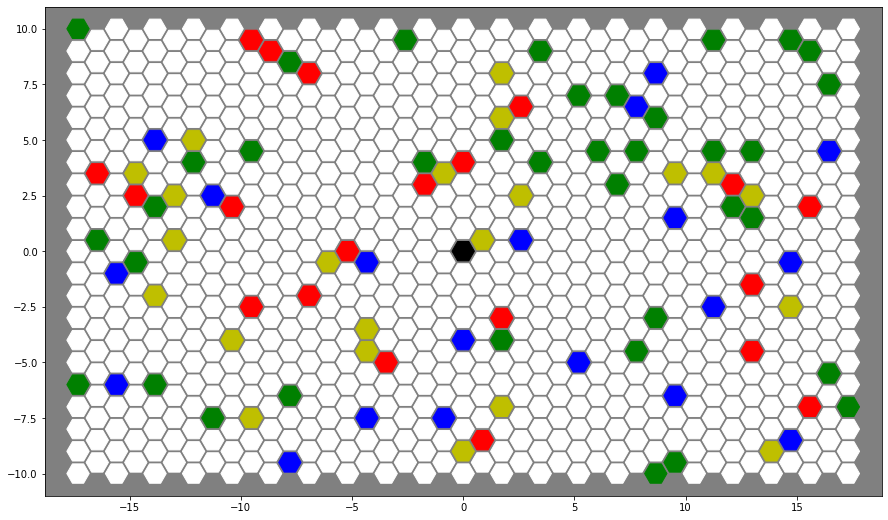

In [ ]:
plt.figure(figsize=(15, 9))
plt.axes(facecolor='gray')
plt.scatter([x[0] for x in xy], [x[1] for x in xy], marker='H', s=500, color=c)

plt.axis('equal')
plt.show()

In [ ]:
zx = list()
y = list()

dct = dict()
for aux in range(int(1e6)):
    a = np.random.randint(2, size=(60,)).tolist()
    b = np.random.randint(2, size=(60,)).tolist()
    c = np.random.randint(7, size=(1,)).tolist()
    d = np.random.randint(7, size=(1,)).tolist()

    dct[str(a) + str(c)] = (a, b, c, d)

for z in range(30):
    dcts = dct.copy()

    ts = time.time()
    for aux in range(int(1e3)):
        a = np.random.randint(2, size=(60,)).tolist()
        b = np.random.randint(2, size=(60,)).tolist()
        c = np.random.randint(7, size=(1,)).tolist()
        d = np.random.randint(7, size=(1,)).tolist()

        dcts[str(a) + str(c)] = (a, b, c, d)
    y += [time.time() - ts]

    aprint(z, False)

aprint(f'{np.mean(y):.3f}')

26

TypeError: ignored

In [ ]:
A = agent.load_me('04_0', Environment(5))

In [ ]:
lv = A.env.level
X = tf.constant(
    np.load(f'{code_folder}/X{lv-1}.npy'),
    dtype=A.agent_tf_dtype)
Y = np.load(f'{code_folder}/Y{lv-1}.npy')

z = tf.constant(
    A.env_description(),
    A.agent_tf_dtype)
z = A.ae.encode(z)

masks = [s.predict_selector(
    z, A.selector_threshold) for s in A.selectors]
masks += [tf.ones_like(A.memory.weights[-1])]

A.memory.predict_masks = masks

y = A.memory.predict(X).numpy()
np.sum(Y * y) / 50

7.885631919962688

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

2021-11-22 20:34:15.395128: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-22 20:34:15.395173: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [ ]:
X = list()

In [ ]:
ab
ac
ad
bc
bd
cd

aabbccdd

In [ ]:
X = np.array([
    [
        1, 1, 0, 0, 1, 0
    ], [
        0, 0, 1, 1, 0, 1
    ], [
        1, 0, 1, 0, 1, 1
    ]
])

Y = np.array([
    [
        0, 0, 0, 1, 1, 1
    ]
])

# X = np.clip([C[0] + C[1], C[1] + C[2], C[2] + C[3], C[0] + C[3], C[0] + C[2], C[1] + C[3]], 0, 1)
# Y = np.clip([C[0] + C[2], C[1] + C[3]], 0, 1)

In [ ]:
def model(N):
    input = tf.keras.layers.Input(6)
    layer = tf.keras.layers.Dense(100, 'sigmoid')(input)
    code = tf.keras.layers.Dense(N, 'sigmoid')(layer)

    encoder = tf.keras.Model(input, code)

    code = tf.keras.layers.Input(N)
    layer = tf.keras.layers.Dense(100, 'sigmoid')(code)
    output = tf.keras.layers.Dense(6, 'sigmoid')(layer)

    decoder = tf.keras.Model(code, output)

    input = tf.keras.Input(6)
    code = encoder(input)
    output = decoder(code)

    model = tf.keras.Model(input, output)
    model.compile('Adam', 'logcosh')

    return model, encoder, decoder

modelo, encoder, decoder = model(3)
# encoder.summary()
# decoder.summary()
# modelo.summary()

In [ ]:
h = modelo.fit(tf.convert_to_tensor(X), tf.convert_to_tensor(X), epochs=3000, verbose=False)
h.history['loss'][-1]

4.378623634693213e-05

In [ ]:
np.round(encoder.predict(tf.convert_to_tensor(X)), 1)

array([[1. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0.5, 1. , 1. ]], dtype=float32)

In [ ]:
np.round(encoder.predict(tf.convert_to_tensor(Y)), 1)

array([[0.1, 1. , 0.5]], dtype=float32)

In [ ]:
np.round(decoder.predict(tf.convert_to_tensor([[0.1, 1, 0.5]])), 1) #.reshape((4, 4))

array([[0.2, 0. , 1. , 0.7, 0.2, 1. ]], dtype=float32)

In [ ]:
np.abs(np.array([[1. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0.5, 1. , 1. ]]) \
- np.array([[0.1, 1. , 0.5]])).sum(1)

array([2.4, 0.6, 0.9])

In [ ]:
plt.figure(figsize=(15,4))

plt.subplot(131)
